# Ensemble Technique Project
Parkinson’s Disease (PD) is a degenerative neurological disorder marked by decreased dopamine levels in the brain. It manifests itself through a deterioration of movement, including the presence of tremors and stiffness. There is commonly a marked effect on speech, including dysarthria (difficulty articulating sounds), hypophonia (lowered volume), and monotone (reduced pitch range). Additionally, cognitive impairments and changes in mood can occur, and risk of dementia is increased. 

### Domain:
- Medicine 

### Context:
Traditional diagnosis of Parkinson’s Disease involves a clinician taking a neurological history of the patient and observing motor skills in various situations. Since there is no definitive laboratory test to diagnose PD, diagnosis is often difficult, particularly in the early stages when motor effects are not yet severe. Monitoring progression of the disease over time requires repeated clinic visits by the patient. An effective screening process, particularly one that doesn’t require a clinic visit, would be beneficial. Since PD patients exhibit characteristic vocal features, voice recordings are a useful and non-invasive tool for diagnosis. If machine learning algorithms could be applied to a voice recording dataset to accurately diagnosis PD, this would be an effective screening step prior to an appointment with a clinician.

### Attribute Information: 
  - name - ASCII subject name and recording number 
  - MDVP:Fo(Hz) - Average vocal fundamental frequency 
  - MDVP:Fhi(Hz) - Maximum vocal fundamental frequency 
  - MDVP:Flo(Hz) - Minimum vocal fundamental frequency
  - MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP - Several  measures of variation in fundamental frequency 
  - MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,S himmer:DDA - Several measures of variation in amplitude 
  - NHR,HNR - Two measures of ratio of noise to tonal components in the voice 
  - status - Health status of the subject (one) - Parkinson's, (zero) - healthy 
  - RPDE,D2 - Two nonlinear dynamical complexity measures 
  - DFA - Signal fractal scaling exponent 
  - spread1,spread2,PPE - Three nonlinear measures of fundamental frequency 
  - variation 9. car name: string (unique for each instance) 

### Learning Outcomes:

   -  Exploratory Data Analysis
   -  Data Cleaning
   -  Data Visualization
   -  Preparing the data to train a model 
   -  Training and making predictions using a classification model
   -  Model evaluation
   -  Supervised Learning
   -  Ensemble Learning 
    
### Objective:
- Goal is to classify the patients into the respective labels using the attributes from their voice recordings.

## 1. Exploratory Data Analysis

### 1.1 Import the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.impute import SimpleImputer 
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_auc_score,roc_curve,auc
# calculate accuracy measures and confusion matrix
from sklearn import metrics

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

### 1.2 Read the data

In [2]:
parkinsons=pd.read_csv('parkinsons.data')
parkinsons.head()

name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0  phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1  phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2  phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3  phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4  phon_R01_S01_5      116.014       141.781       110.655         0.01284   

   MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  ...  \
0           0.00007   0.00370   0.00554     0.01109       0.04374  ...   
1           0.00008   0.00465   0.00696     0.01394       0.06134  ...   
2           0.00009   0.00544   0.00781     0.01633       0.05233  ...   
3           0.00009   0.00502   0.00698     0.01505       0.05492  ...   
4           0.00011   0.00655   0.00908     0.01966       0.06425  ...   

   Shimmer:DDA      NHR     HNR  status      RPDE       DFA   spread1  \
0      0.06545  0.02211  21.033       1  0.414783  0.815285 -4.813031   
1      0.09403  0.01929  19.085       1  0.458359  0.819521 -4.075192   
2      0.08270  0.01309  20.651       1  0.429895  0.825288 -4.443179   
3      0.08771  0.01353  20.644       1  0.434969  0.819235 -4.117501   
4      0.10470  0.01767  19.649       1  0.417356  0.823484 -3.747787   

    spread2        D2       PPE  
0  0.266482  2.301442  0.284654  
1  0.335590  2.486855  0.368674  
2  0.311173  2.342259  0.332634  
3  0.334147  2.405554  0.368975  
4  0.234513  2.332180  0.410335  

[5 rows x 24 columns]

<b>Target Column rearrange:- </b> As our Target Column(Personal Loan) is in middle of dataframe so for more convinient I have drop the personal loan column from the original place and appended at last of dataframe.

In [3]:
park = parkinsons['status']
parkinsons.drop(['status'], axis=1, inplace = True)
parkinsons['status'] = park
parkinsons.head()

name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0  phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1  phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2  phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3  phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4  phon_R01_S01_5      116.014       141.781       110.655         0.01284   

   MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  ...  \
0           0.00007   0.00370   0.00554     0.01109       0.04374  ...   
1           0.00008   0.00465   0.00696     0.01394       0.06134  ...   
2           0.00009   0.00544   0.00781     0.01633       0.05233  ...   
3           0.00009   0.00502   0.00698     0.01505       0.05492  ...   
4           0.00011   0.00655   0.00908     0.01966       0.06425  ...   

   Shimmer:DDA      NHR     HNR      RPDE       DFA   spread1   spread2  \
0      0.06545  0.02211  21.033  0.414783  0.815285 -4.813031  0.266482   
1      0.09403  0.01929  19.085  0.458359  0.819521 -4.075192  0.335590   
2      0.08270  0.01309  20.651  0.429895  0.825288 -4.443179  0.311173   
3      0.08771  0.01353  20.644  0.434969  0.819235 -4.117501  0.334147   
4      0.10470  0.01767  19.649  0.417356  0.823484 -3.747787  0.234513   

         D2       PPE  status  
0  2.301442  0.284654       1  
1  2.486855  0.368674       1  
2  2.342259  0.332634       1  
3  2.405554  0.368975       1  
4  2.332180  0.410335       1  

[5 rows x 24 columns]

#### Observations
- The <b>name</b> variable can be ignored as it will not affect on our model. As we know patient name is just to maitain the record in serial order. There is no relationship with <b>name</b> and <b>status</b>.
- Target Variable is <b>status</b> which describe whether the person has Parkinson’s Disease or not. This is the variable which we need to predict.

## 2. It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of records, structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the dataset. Mention a few comments in this regard.

### 2.1 Shape the data

In [4]:
rows_count, columns_count = parkinsons.shape
print('Total Number of rows :', rows_count)
print('Total Number of columns :', columns_count)

Total Number of rows : 195
Total Number of columns : 24


In [5]:
parkinsons.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'spread1',
       'spread2', 'D2', 'PPE', 'status'],
      dtype='object')

#### Observations
- Shape of the dataframe is (195, 24). There are 195 rows and 24 columns in the dataset.

### 2.2 Data type of each attribute

In [6]:
parkinsons.dtypes

name                 object
MDVP:Fo(Hz)         float64
MDVP:Fhi(Hz)        float64
MDVP:Flo(Hz)        float64
MDVP:Jitter(%)      float64
MDVP:Jitter(Abs)    float64
MDVP:RAP            float64
MDVP:PPQ            float64
Jitter:DDP          float64
MDVP:Shimmer        float64
MDVP:Shimmer(dB)    float64
Shimmer:APQ3        float64
Shimmer:APQ5        float64
MDVP:APQ            float64
Shimmer:DDA         float64
NHR                 float64
HNR                 float64
RPDE                float64
DFA                 float64
spread1             float64
spread2             float64
D2                  float64
PPE                 float64
status                int64
dtype: object

In [7]:
parkinsons.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

#### Observations
- Only <b>name</b> column is of string, rest all the columns are of numeric type.

### 2.3 Check for the null values

In [8]:
#null values
parkinsons.isnull().sum() 

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
status              0
dtype: int64

In [9]:
parkinsons.isnull().values.any()

False

### 2.4 Finding unique data

In [10]:
parkinsons.apply(lambda x: len(x.unique()))

name                195
MDVP:Fo(Hz)         195
MDVP:Fhi(Hz)        195
MDVP:Flo(Hz)        195
MDVP:Jitter(%)      173
MDVP:Jitter(Abs)     19
MDVP:RAP            155
MDVP:PPQ            165
Jitter:DDP          180
MDVP:Shimmer        188
MDVP:Shimmer(dB)    149
Shimmer:APQ3        184
Shimmer:APQ5        189
MDVP:APQ            189
Shimmer:DDA         189
NHR                 185
HNR                 195
RPDE                195
DFA                 195
spread1             195
spread2             194
D2                  195
PPE                 195
status                2
dtype: int64

### 2.5 5 point summary of numerical attributes

In [11]:
parkinsons.describe().transpose()

count        mean        std         min         25%  \
MDVP:Fo(Hz)       195.0  154.228641  41.390065   88.333000  117.572000   
MDVP:Fhi(Hz)      195.0  197.104918  91.491548  102.145000  134.862500   
MDVP:Flo(Hz)      195.0  116.324631  43.521413   65.476000   84.291000   
MDVP:Jitter(%)    195.0    0.006220   0.004848    0.001680    0.003460   
MDVP:Jitter(Abs)  195.0    0.000044   0.000035    0.000007    0.000020   
MDVP:RAP          195.0    0.003306   0.002968    0.000680    0.001660   
MDVP:PPQ          195.0    0.003446   0.002759    0.000920    0.001860   
Jitter:DDP        195.0    0.009920   0.008903    0.002040    0.004985   
MDVP:Shimmer      195.0    0.029709   0.018857    0.009540    0.016505   
MDVP:Shimmer(dB)  195.0    0.282251   0.194877    0.085000    0.148500   
Shimmer:APQ3      195.0    0.015664   0.010153    0.004550    0.008245   
Shimmer:APQ5      195.0    0.017878   0.012024    0.005700    0.009580   
MDVP:APQ          195.0    0.024081   0.016947    0.007190    0.013080   
Shimmer:DDA       195.0    0.046993   0.030459    0.013640    0.024735   
NHR               195.0    0.024847   0.040418    0.000650    0.005925   
HNR               195.0   21.885974   4.425764    8.441000   19.198000   
RPDE              195.0    0.498536   0.103942    0.256570    0.421306   
DFA               195.0    0.718099   0.055336    0.574282    0.674758   
spread1           195.0   -5.684397   1.090208   -7.964984   -6.450096   
spread2           195.0    0.226510   0.083406    0.006274    0.174351   
D2                195.0    2.381826   0.382799    1.423287    2.099125   
PPE               195.0    0.206552   0.090119    0.044539    0.137451   
status            195.0    0.753846   0.431878    0.000000    1.000000   

                         50%         75%         max  
MDVP:Fo(Hz)       148.790000  182.769000  260.105000  
MDVP:Fhi(Hz)      175.829000  224.205500  592.030000  
MDVP:Flo(Hz)      104.315000  140.018500  239.170000  
MDVP:Jitter(%)      0.004940    0.007365    0.033160  
MDVP:Jitter(Abs)    0.000030    0.000060    0.000260  
MDVP:RAP            0.002500    0.003835    0.021440  
MDVP:PPQ            0.002690    0.003955    0.019580  
Jitter:DDP          0.007490    0.011505    0.064330  
MDVP:Shimmer        0.022970    0.037885    0.119080  
MDVP:Shimmer(dB)    0.221000    0.350000    1.302000  
Shimmer:APQ3        0.012790    0.020265    0.056470  
Shimmer:APQ5        0.013470    0.022380    0.079400  
MDVP:APQ            0.018260    0.029400    0.137780  
Shimmer:DDA         0.038360    0.060795    0.169420  
NHR                 0.011660    0.025640    0.314820  
HNR                22.085000   25.075500   33.047000  
RPDE                0.495954    0.587562    0.685151  
DFA                 0.722254    0.761881    0.825288  
spread1            -5.720868   -5.046192   -2.434031  
spread2             0.218885    0.279234    0.450493  
D2                  2.361532    2.636456    3.671155  
PPE                 0.194052    0.252980    0.527367  
status              1.000000    1.000000    1.000000

In [12]:
#Find Mean
parkinsons.mean()

MDVP:Fo(Hz)         154.228641
MDVP:Fhi(Hz)        197.104918
MDVP:Flo(Hz)        116.324631
MDVP:Jitter(%)        0.006220
MDVP:Jitter(Abs)      0.000044
MDVP:RAP              0.003306
MDVP:PPQ              0.003446
Jitter:DDP            0.009920
MDVP:Shimmer          0.029709
MDVP:Shimmer(dB)      0.282251
Shimmer:APQ3          0.015664
Shimmer:APQ5          0.017878
MDVP:APQ              0.024081
Shimmer:DDA           0.046993
NHR                   0.024847
HNR                  21.885974
RPDE                  0.498536
DFA                   0.718099
spread1              -5.684397
spread2               0.226510
D2                    2.381826
PPE                   0.206552
status                0.753846
dtype: float64

In [13]:
#Find Median
parkinsons.median()

MDVP:Fo(Hz)         148.790000
MDVP:Fhi(Hz)        175.829000
MDVP:Flo(Hz)        104.315000
MDVP:Jitter(%)        0.004940
MDVP:Jitter(Abs)      0.000030
MDVP:RAP              0.002500
MDVP:PPQ              0.002690
Jitter:DDP            0.007490
MDVP:Shimmer          0.022970
MDVP:Shimmer(dB)      0.221000
Shimmer:APQ3          0.012790
Shimmer:APQ5          0.013470
MDVP:APQ              0.018260
Shimmer:DDA           0.038360
NHR                   0.011660
HNR                  22.085000
RPDE                  0.495954
DFA                   0.722254
spread1              -5.720868
spread2               0.218885
D2                    2.361532
PPE                   0.194052
status                1.000000
dtype: float64

In [14]:
#Find Standard Deviation
parkinsons.std()

MDVP:Fo(Hz)         41.390065
MDVP:Fhi(Hz)        91.491548
MDVP:Flo(Hz)        43.521413
MDVP:Jitter(%)       0.004848
MDVP:Jitter(Abs)     0.000035
MDVP:RAP             0.002968
MDVP:PPQ             0.002759
Jitter:DDP           0.008903
MDVP:Shimmer         0.018857
MDVP:Shimmer(dB)     0.194877
Shimmer:APQ3         0.010153
Shimmer:APQ5         0.012024
MDVP:APQ             0.016947
Shimmer:DDA          0.030459
NHR                  0.040418
HNR                  4.425764
RPDE                 0.103942
DFA                  0.055336
spread1              1.090208
spread2              0.083406
D2                   0.382799
PPE                  0.090119
status               0.431878
dtype: float64

#### Observations
- <b>Important : </b>Here we can see that minimum value of spread1 column is <b>-7.964984</b>.
- Other varibales has clean data.

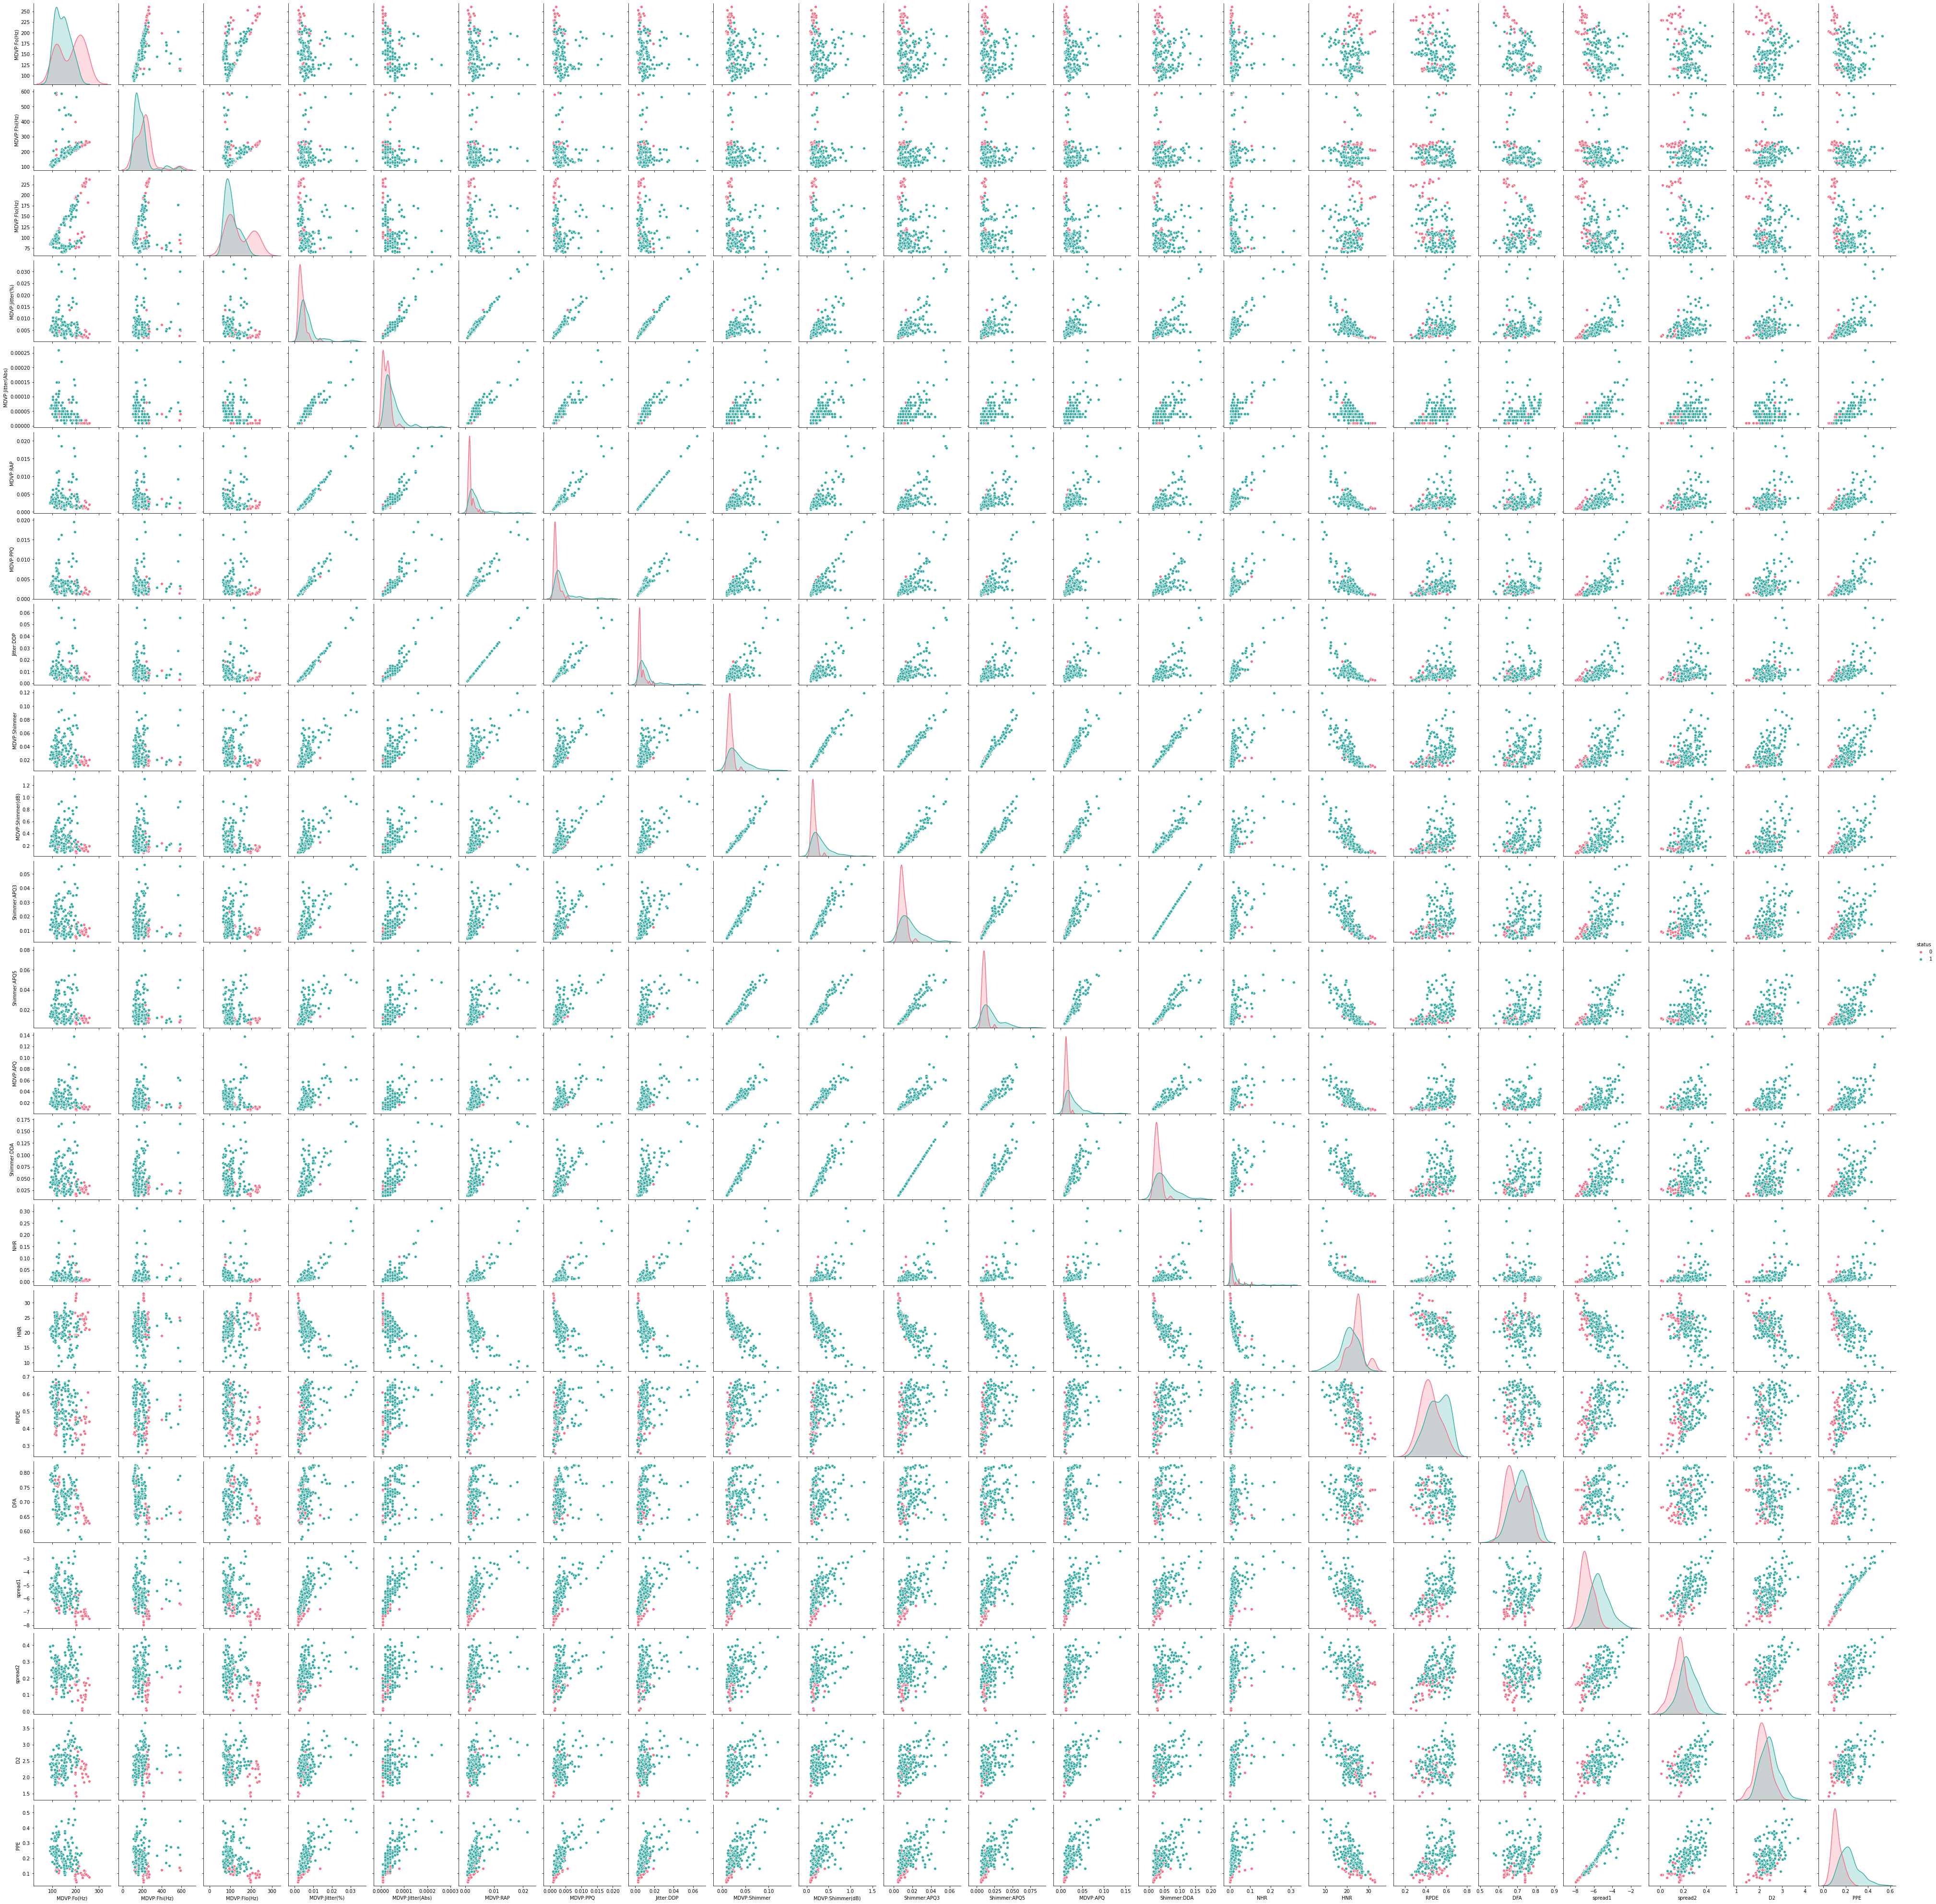

In [15]:
sns.pairplot(parkinsons, hue="status",palette="husl")

## 3. Using univariate & bivariate analysis to check the individual attributes for their basic statistics such as central values, spread, tails, relationships between variables etc. mention your observations.

### 3.1 Univariate EDA

In [16]:
parkinsons.skew(axis = 0, skipna = True) 

MDVP:Fo(Hz)         0.591737
MDVP:Fhi(Hz)        2.542146
MDVP:Flo(Hz)        1.217350
MDVP:Jitter(%)      3.084946
MDVP:Jitter(Abs)    2.649071
MDVP:RAP            3.360708
MDVP:PPQ            3.073892
Jitter:DDP          3.362058
MDVP:Shimmer        1.666480
MDVP:Shimmer(dB)    1.999389
Shimmer:APQ3        1.580576
Shimmer:APQ5        1.798697
MDVP:APQ            2.618047
Shimmer:DDA         1.580618
NHR                 4.220709
HNR                -0.514317
RPDE               -0.143402
DFA                -0.033214
spread1             0.432139
spread2             0.144430
D2                  0.430384
PPE                 0.797491
status             -1.187727
dtype: float64

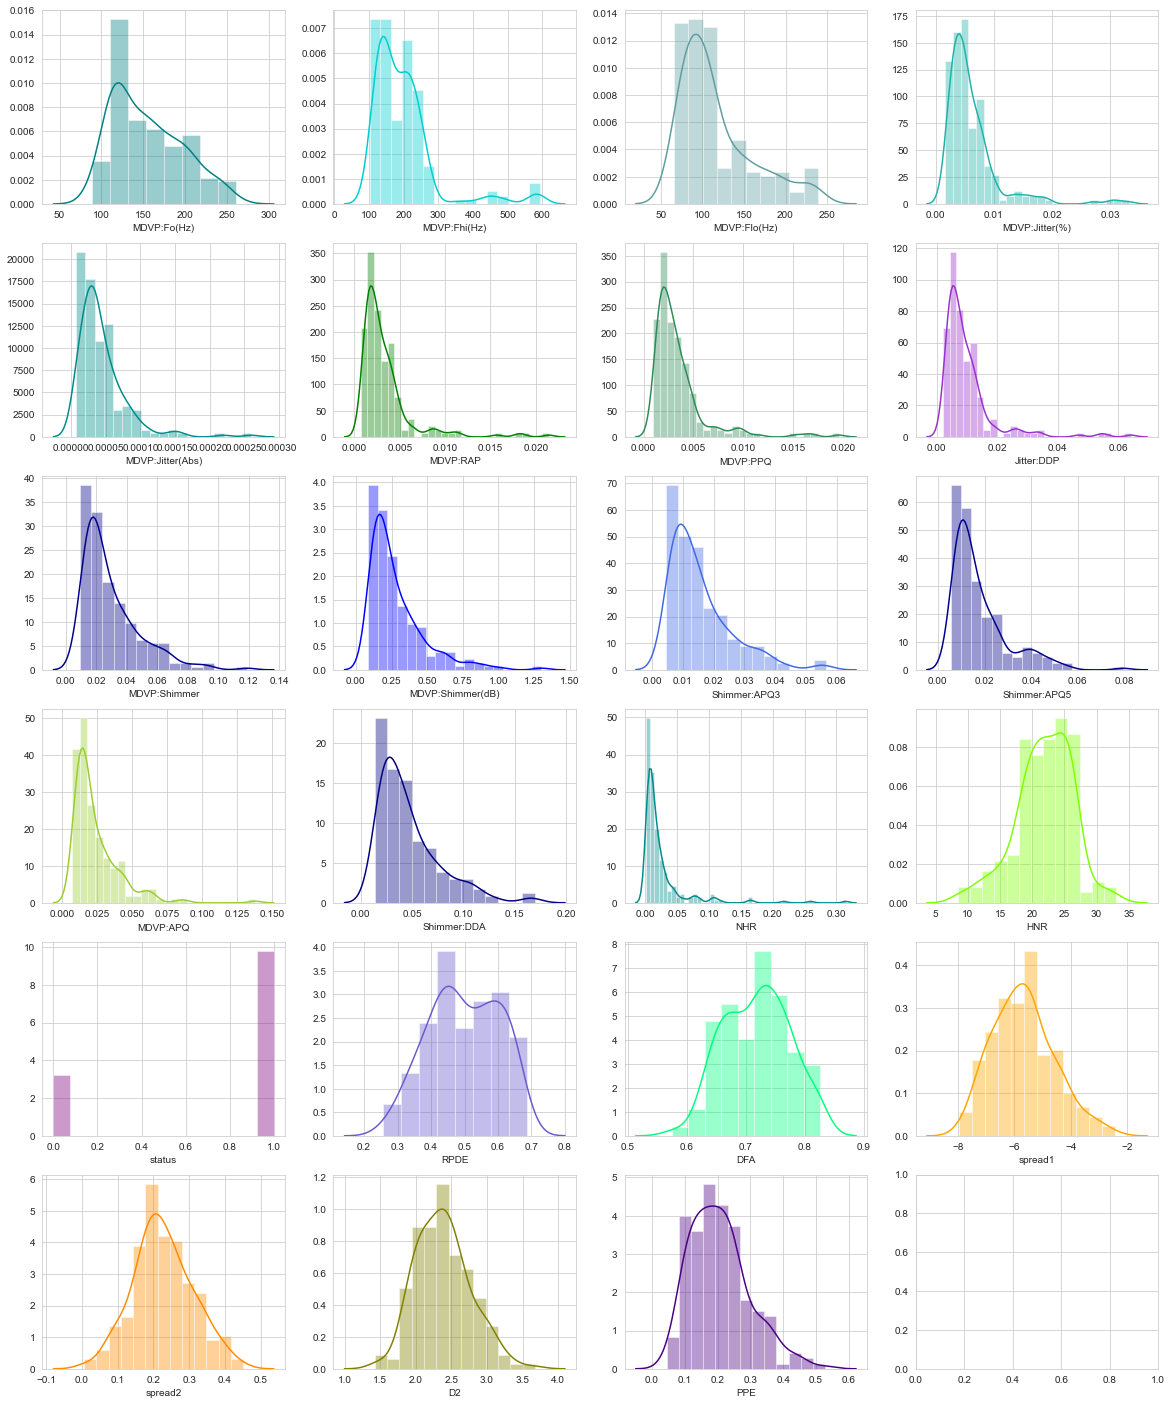

In [17]:
# first see distribution
sns.set_style("whitegrid") 
plotCofig, axes = plt.subplots(nrows=6,ncols = 4, figsize=(20, 25))

sns.distplot(parkinsons['MDVP:Fo(Hz)'],ax=axes[0,0],color="teal")
sns.distplot(parkinsons['MDVP:Fhi(Hz)'],ax=axes[0,1],color = 'darkturquoise')
sns.distplot(parkinsons['MDVP:Flo(Hz)'],ax=axes[0,2],color="cadetblue")
sns.distplot(parkinsons['MDVP:Jitter(%)'],ax=axes[0,3],color="lightseagreen")
sns.distplot(parkinsons['MDVP:Jitter(Abs)'],ax=axes[1,0],color="darkcyan")
sns.distplot(parkinsons['MDVP:RAP'],ax=axes[1,1],color="green")
sns.distplot(parkinsons['MDVP:PPQ'],ax=axes[1,2],color="seagreen")
sns.distplot(parkinsons['Jitter:DDP'],ax=axes[1,3],color="darkorchid")
sns.distplot(parkinsons['MDVP:Shimmer'],ax=axes[2,0],color = 'darkblue')
sns.distplot(parkinsons['MDVP:Shimmer(dB)'],ax=axes[2,1],color = 'blue')
sns.distplot(parkinsons['Shimmer:APQ3'],ax=axes[2,2],color = 'royalblue')
sns.distplot(parkinsons['Shimmer:APQ5'],ax=axes[2,3],color = 'darkblue')
sns.distplot(parkinsons['MDVP:APQ'],ax=axes[3,0],color = 'yellowgreen')
sns.distplot(parkinsons['Shimmer:DDA'],ax=axes[3,1],color = 'navy')
sns.distplot(parkinsons['NHR'],ax=axes[3,2],color = 'darkcyan')
sns.distplot(parkinsons['HNR'],ax=axes[3,3],color = 'chartreuse')
sns.distplot(parkinsons['status'],ax=axes[4,0],color = 'purple')
sns.distplot(parkinsons['RPDE'],ax=axes[4,1],color = 'slateblue')
sns.distplot(parkinsons['DFA'],ax=axes[4,2],color = 'springgreen')
sns.distplot(parkinsons['spread1'],ax=axes[4,3],color = 'orange')
sns.distplot(parkinsons['spread2'],ax=axes[5,0],color = 'darkorange')
sns.distplot(parkinsons['D2'],ax=axes[5,1],color = 'olive')
sns.distplot(parkinsons['PPE'],ax=axes[5,2],color = 'indigo')

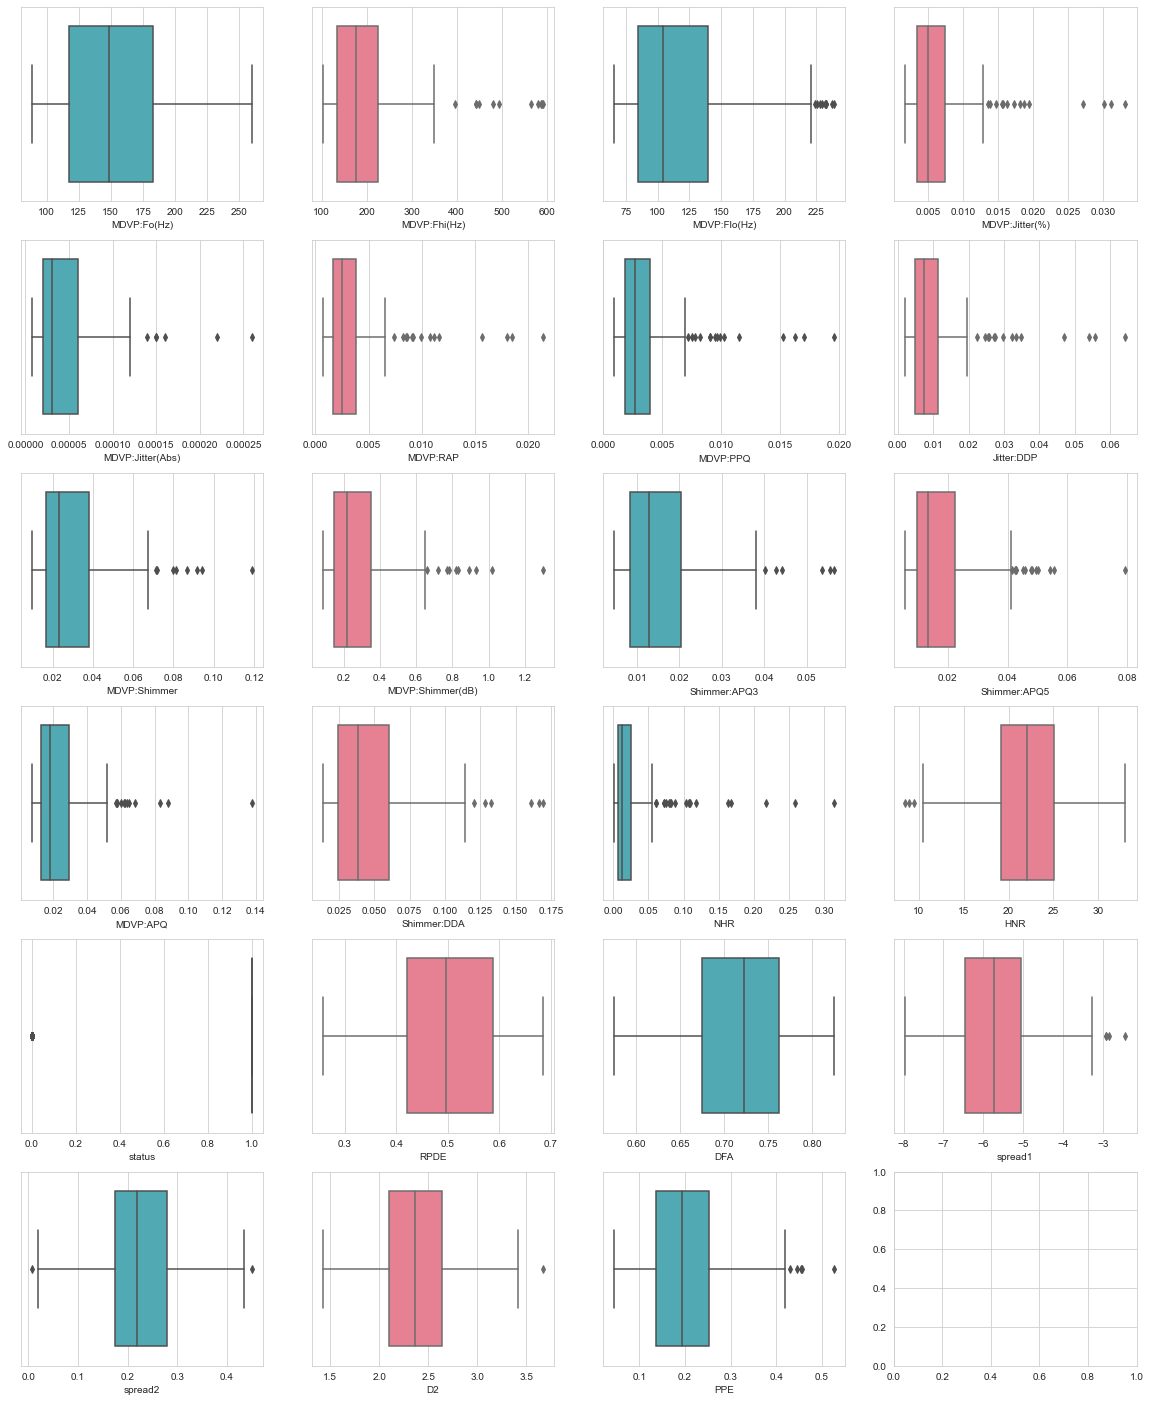

In [18]:
# first see distribution
sns.set_style("whitegrid") 
plotCofig, axes = plt.subplots(nrows=6,ncols = 4, figsize=(20, 25))

sns.boxplot(parkinsons['MDVP:Fo(Hz)'],ax=axes[0,0],palette="YlGnBu")
sns.boxplot(parkinsons['MDVP:Fhi(Hz)'],ax=axes[0,1],palette="husl")
sns.boxplot(parkinsons['MDVP:Flo(Hz)'],ax=axes[0,2],palette="YlGnBu")
sns.boxplot(parkinsons['MDVP:Jitter(%)'],ax=axes[0,3],palette="husl")
sns.boxplot(parkinsons['MDVP:Jitter(Abs)'],ax=axes[1,0],palette="YlGnBu")
sns.boxplot(parkinsons['MDVP:RAP'],ax=axes[1,1],palette="husl")
sns.boxplot(parkinsons['MDVP:PPQ'],ax=axes[1,2],palette="YlGnBu")
sns.boxplot(parkinsons['Jitter:DDP'],ax=axes[1,3],palette="husl")
sns.boxplot(parkinsons['MDVP:Shimmer'],ax=axes[2,0],palette="YlGnBu")
sns.boxplot(parkinsons['MDVP:Shimmer(dB)'],ax=axes[2,1],palette="husl")
sns.boxplot(parkinsons['Shimmer:APQ3'],ax=axes[2,2],palette="YlGnBu")
sns.boxplot(parkinsons['Shimmer:APQ5'],ax=axes[2,3],palette="husl")
sns.boxplot(parkinsons['MDVP:APQ'],ax=axes[3,0],palette="YlGnBu")
sns.boxplot(parkinsons['Shimmer:DDA'],ax=axes[3,1],palette="husl")
sns.boxplot(parkinsons['NHR'],ax=axes[3,2],palette="YlGnBu")
sns.boxplot(parkinsons['HNR'],ax=axes[3,3],palette="husl")
sns.boxplot(parkinsons['status'],ax=axes[4,0],palette="YlGnBu")
sns.boxplot(parkinsons['RPDE'],ax=axes[4,1],palette="husl")
sns.boxplot(parkinsons['DFA'],ax=axes[4,2],palette="YlGnBu")
sns.boxplot(parkinsons['spread1'],ax=axes[4,3],palette="husl")
sns.boxplot(parkinsons['spread2'],ax=axes[5,0],palette="YlGnBu")
sns.boxplot(parkinsons['D2'],ax=axes[5,1],palette="husl")
sns.boxplot(parkinsons['PPE'],ax=axes[5,2],palette="YlGnBu")

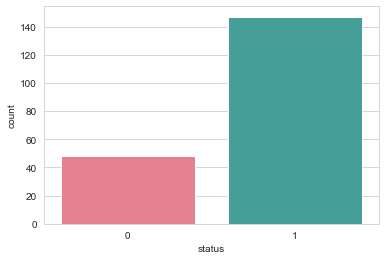

In [19]:
## check class balance
sns.countplot(x='status', data = parkinsons,palette="husl")
# as we can see, datas are not balanced with status class which means there 147 records who having pankison.

In [20]:
parkinsons.status.value_counts()

1    147
0     48
Name: status, dtype: int64

#### Univariate Observation :
- Distribution of most of features/columns data point are right skewed.That means very long at right side and very short tail at left side.
- Data points of Feature columns <b>MDVP:Fo(Hz)</b>, <b>MDVP:Fhi(Hz)</b>, <b>MDVP:Flo(Hz)</b>, <b>MDVP:Jitter(%)</b>, <b>MDVP:RAP</b>, <b>MDVP:PPQ</b>, <b>MDVP:Shimmer</b>, <b>Shimmer:APQ3</b>,<b>NHR</b> are in right skewed.
- Data Points of Feature columns <b>HNR</b>, <b>RPDE</b>, <b>DFA</b>, <b>spread1</b>, <b>spread2</b>, <b>D2</b>, <b>PPE</b> are nealy normaly distributed.
- Since distribution is right skewed, So We can see that there are many outlier at data points.(As above box plot we can see.)
- Spread is narrow for such features like <b>MDVP:Jitter(%)</b>, <b>NHR</b>, <b>RAP</b>, <b>PPQ</b>, <b>RPQ</b> etc.

### 3.2 Bivariate EDA

In [21]:
cor=parkinsons.corr()
cor

MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
MDVP:Fo(Hz)          1.000000      0.400985      0.596546       -0.118003   
MDVP:Fhi(Hz)         0.400985      1.000000      0.084951        0.102086   
MDVP:Flo(Hz)         0.596546      0.084951      1.000000       -0.139919   
MDVP:Jitter(%)      -0.118003      0.102086     -0.139919        1.000000   
MDVP:Jitter(Abs)    -0.382027     -0.029198     -0.277815        0.935714   
MDVP:RAP            -0.076194      0.097177     -0.100519        0.990276   
MDVP:PPQ            -0.112165      0.091126     -0.095828        0.974256   
Jitter:DDP          -0.076213      0.097150     -0.100488        0.990276   
MDVP:Shimmer        -0.098374      0.002281     -0.144543        0.769063   
MDVP:Shimmer(dB)    -0.073742      0.043465     -0.119089        0.804289   
Shimmer:APQ3        -0.094717     -0.003743     -0.150747        0.746625   
Shimmer:APQ5        -0.070682     -0.009997     -0.101095        0.725561   
MDVP:APQ            -0.077774      0.004937     -0.107293        0.758255   
Shimmer:DDA         -0.094732     -0.003733     -0.150737        0.746635   
NHR                 -0.021981      0.163766     -0.108670        0.906959   
HNR                  0.059144     -0.024893      0.210851       -0.728165   
RPDE                -0.383894     -0.112404     -0.400143        0.360673   
DFA                 -0.446013     -0.343097     -0.050406        0.098572   
spread1             -0.413738     -0.076658     -0.394857        0.693577   
spread2             -0.249450     -0.002954     -0.243829        0.385123   
D2                   0.177980      0.176323     -0.100629        0.433434   
PPE                 -0.372356     -0.069543     -0.340071        0.721543   
status              -0.383535     -0.166136     -0.380200        0.278220   

                  MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  \
MDVP:Fo(Hz)              -0.382027 -0.076194 -0.112165   -0.076213   
MDVP:Fhi(Hz)             -0.029198  0.097177  0.091126    0.097150   
MDVP:Flo(Hz)             -0.277815 -0.100519 -0.095828   -0.100488   
MDVP:Jitter(%)            0.935714  0.990276  0.974256    0.990276   
MDVP:Jitter(Abs)          1.000000  0.922911  0.897778    0.922913   
MDVP:RAP                  0.922911  1.000000  0.957317    1.000000   
MDVP:PPQ                  0.897778  0.957317  1.000000    0.957319   
Jitter:DDP                0.922913  1.000000  0.957319    1.000000   
MDVP:Shimmer              0.703322  0.759581  0.797826    0.759555   
MDVP:Shimmer(dB)          0.716601  0.790652  0.839239    0.790621   
Shimmer:APQ3              0.697153  0.744912  0.763580    0.744894   
Shimmer:APQ5              0.648961  0.709927  0.786780    0.709907   
MDVP:APQ                  0.648793  0.737455  0.804139    0.737439   
Shimmer:DDA               0.697170  0.744919  0.763592    0.744901   
NHR                       0.834972  0.919521  0.844604    0.919548   
HNR                      -0.656810 -0.721543 -0.731510   -0.721494   
RPDE                      0.441839  0.342140  0.333274    0.342079   
DFA                       0.175036  0.064083  0.196301    0.064026   
spread1                   0.735779  0.648328  0.716489    0.648328   
spread2                   0.388543  0.324407  0.407605    0.324377   
D2                        0.310694  0.426605  0.412524    0.426556   
PPE                       0.748162  0.670999  0.769647    0.671005   
status                    0.338653  0.266668  0.288698    0.266646   

                  MDVP:Shimmer  MDVP:Shimmer(dB)  ...  Shimmer:DDA       NHR  \
MDVP:Fo(Hz)          -0.098374         -0.073742  ...    -0.094732 -0.021981   
MDVP:Fhi(Hz)          0.002281          0.043465  ...    -0.003733  0.163766   
MDVP:Flo(Hz)         -0.144543         -0.119089  ...    -0.150737 -0.108670   
MDVP:Jitter(%)        0.769063          0.804289  ...     0.746635  0.906959   
MDVP:Jitter(Abs)      0.703322          0.716601  ...     0.697170  0.834972   
MDVP:RAP

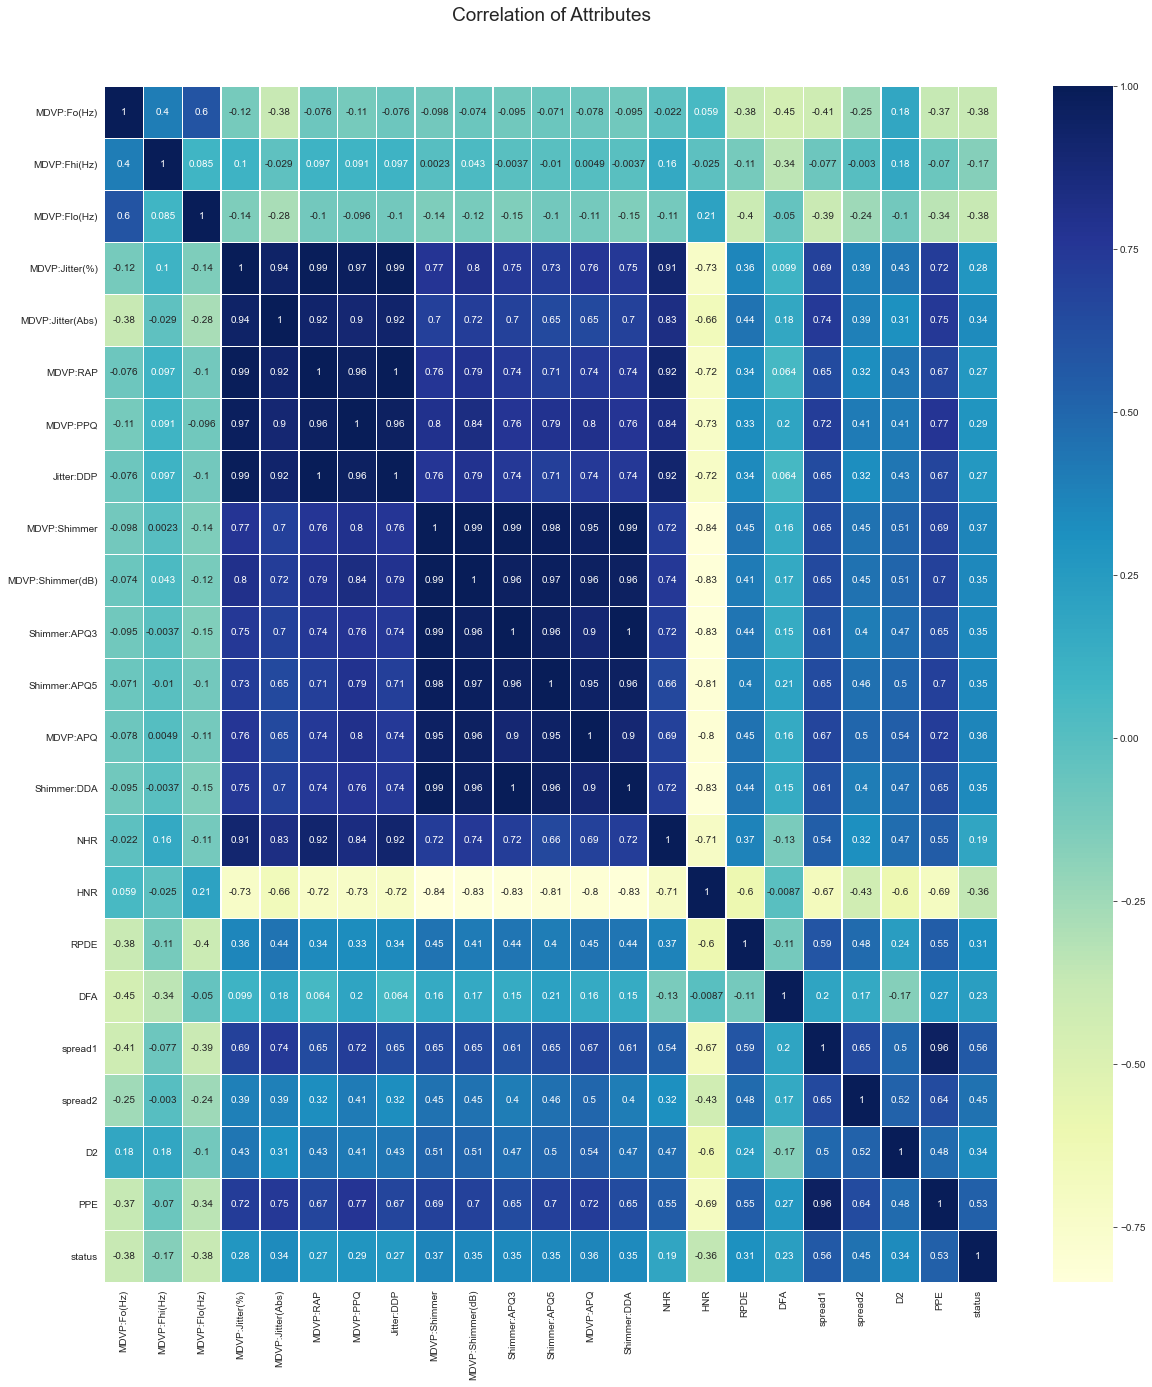

In [22]:
# First, looking correlation between features:

plt.figure(figsize=(20, 22))
plt.title('Correlation of Attributes', y=1.05, size=19)
sns.heatmap(cor,annot=True,linewidths=.5,cmap="YlGnBu")

#### Heat-Map Observations
- Some of fetures/columns seem like similar or their correlation are very high near to <b>0.99</b>.
- <b>MDVP:Shimmer</b>, <b>MDVP:Shimmer(dB)</b>, <b>Shimmer:DDA</b>, <b>Shimmer:APQ3</b>, <b>Shimmer:APQ5</b> feature look like similar to each other.
- Samething with <b>Jitter</b> related columns, these looks similar due to high correaltion.
- As we can say most of feture are not independent. They are co-related to each other.

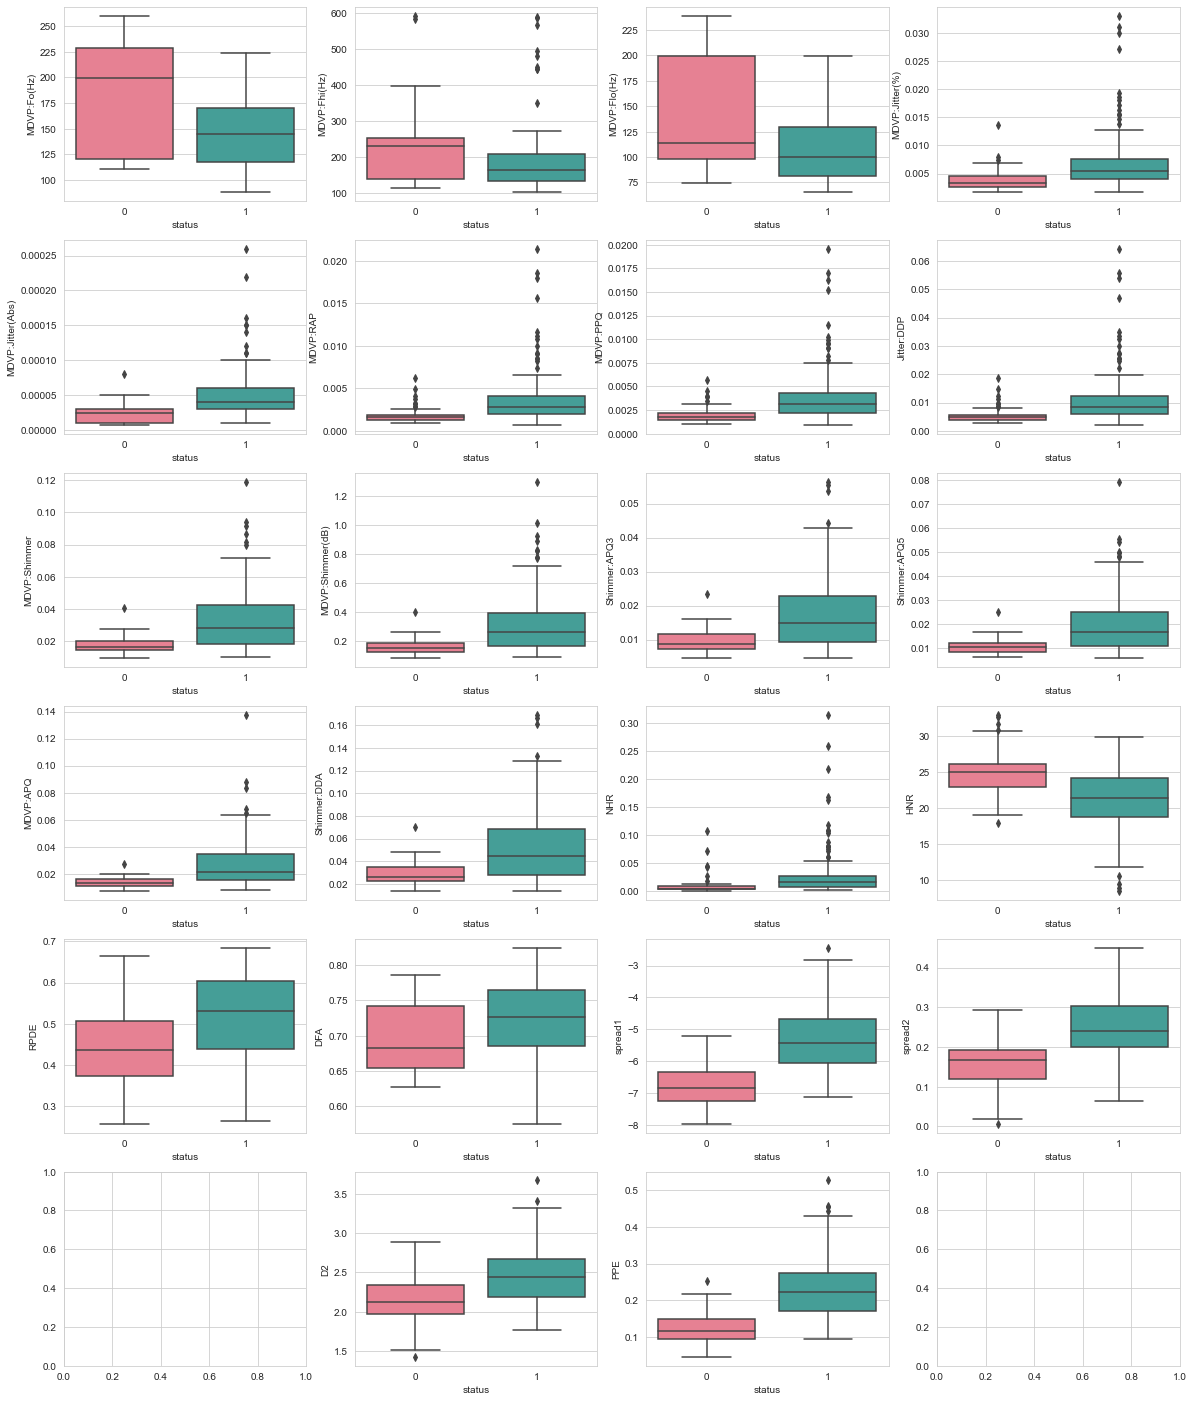

In [23]:
# first see distribution
sns.set_style("whitegrid") 
plotCofig, axes = plt.subplots(nrows=6,ncols = 4, figsize=(20, 25))

sns.boxplot(y = parkinsons['MDVP:Fo(Hz)'],x = parkinsons['status'],ax=axes[0,0],palette="husl")
sns.boxplot(y = parkinsons['MDVP:Fhi(Hz)'],x = parkinsons['status'],ax=axes[0,1],palette="husl")
sns.boxplot(y = parkinsons['MDVP:Flo(Hz)'],x = parkinsons['status'],ax=axes[0,2],palette="husl")
sns.boxplot(y = parkinsons['MDVP:Jitter(%)'],x = parkinsons['status'],ax=axes[0,3],palette="husl")
sns.boxplot(y = parkinsons['MDVP:Jitter(Abs)'],x = parkinsons['status'],ax=axes[1,0],palette="husl")
sns.boxplot(y = parkinsons['MDVP:RAP'],x = parkinsons['status'],ax=axes[1,1],palette="husl")
sns.boxplot(y = parkinsons['MDVP:PPQ'],x = parkinsons['status'],ax=axes[1,2],palette="husl")
sns.boxplot(y = parkinsons['Jitter:DDP'],x = parkinsons['status'],ax=axes[1,3],palette="husl")
sns.boxplot(y = parkinsons['MDVP:Shimmer'],x = parkinsons['status'],ax=axes[2,0],palette="husl")
sns.boxplot(y = parkinsons['MDVP:Shimmer(dB)'],x = parkinsons['status'],ax=axes[2,1],palette="husl")
sns.boxplot(y = parkinsons['Shimmer:APQ3'],x = parkinsons['status'],ax=axes[2,2],palette="husl")
sns.boxplot(y = parkinsons['Shimmer:APQ5'],x = parkinsons['status'],ax=axes[2,3],palette="husl")
sns.boxplot(y = parkinsons['MDVP:APQ'],x = parkinsons['status'],ax=axes[3,0],palette="husl")
sns.boxplot(y = parkinsons['Shimmer:DDA'],x = parkinsons['status'],ax=axes[3,1],palette="husl")
sns.boxplot(y = parkinsons['NHR'],x = parkinsons['status'],ax=axes[3,2],palette="husl")
sns.boxplot(y = parkinsons['HNR'],x = parkinsons['status'],ax=axes[3,3],palette="husl")
sns.boxplot(y = parkinsons['RPDE'],x = parkinsons['status'],ax=axes[4,0],palette="husl")
sns.boxplot(y = parkinsons['DFA'],x = parkinsons['status'],ax=axes[4,1],palette="husl")
sns.boxplot(y = parkinsons['spread1'],x = parkinsons['status'],ax=axes[4,2],palette="husl")
sns.boxplot(y = parkinsons['spread2'],x = parkinsons['status'],ax=axes[4,3],palette="husl")
sns.boxplot(y = parkinsons['D2'],x = parkinsons['status'],ax=axes[5,1],palette="husl")
sns.boxplot(y = parkinsons['PPE'],x = parkinsons['status'],ax=axes[5,2],palette="husl")

#### Boxplot Observations
- Most datapoints of feature are overlapping each other with person having Parkinson or not.
- But <b>spread1</b> and <b>spread2</b>, as we can see, are clearly seperated from each other.There is higher chance the one having higher value of spred 1 and spread 2, will be affected by perkinson.
- The one having lowere value of <b>MDVP:Fo</b>, <b>MDVP:Flo</b>, <b>NHR</b> might be affected perkinson in other word we can say higher value of these parameter not overlapping each other which mean higher value of these parameter indicate the one is not affected by perkinson.
- Feature <b>RPDE</b>, <b>DFA</b> overlapping with status at higher value.

In [24]:
park_counts = pd.DataFrame(parkinsons["status"].value_counts()).reset_index()
park_counts.columns =["Labels","status"]
park_counts

Labels  status
0       1     147
1       0      48

#### Observations
- Out of 195 data points, 147 are labeled as 0 and 48 as 1. Percentage of healty patient is significantlly greater than patients who are having Parkinson's Disease. I have also show the percentage using in pie chart below.

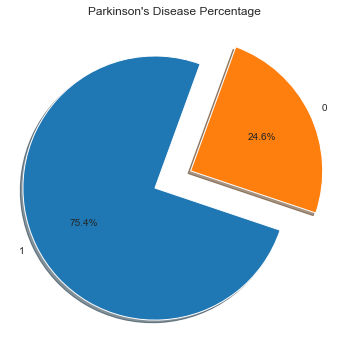

In [25]:
fig1, ax1 = plt.subplots(figsize=(6,6))
explode = (0, 0.30)
ax1.pie(park_counts["status"], explode=explode, labels=park_counts["Labels"], autopct='%1.1f%%',
        shadow=True, startangle=70)
ax1.axis('equal')  
plt.title("Parkinson's Disease Percentage")
plt.show()

## 4.  Split the dataset into training and test set in the ratio of 70:30 (Training:Test)
### 4.1 Dimensionality Reduction
- As we have seen above <b>name</b> is not relevent for our model building so we will drop it.
#### 4.1.1 Dropping 'name' coloumn

In [26]:
parkinsons.head(1)

name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0  phon_R01_S01_1      119.992       157.302        74.997         0.00784   

   MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  ...  \
0           0.00007    0.0037   0.00554     0.01109       0.04374  ...   

   Shimmer:DDA      NHR     HNR      RPDE       DFA   spread1   spread2  \
0      0.06545  0.02211  21.033  0.414783  0.815285 -4.813031  0.266482   

         D2       PPE  status  
0  2.301442  0.284654       1  

[1 rows x 24 columns]

In [27]:
park=parkinsons.drop(['name'], axis =1 )
park.shape

(195, 23)

In [28]:
park.head(1)

MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  MDVP:Jitter(Abs)  \
0      119.992       157.302        74.997         0.00784           0.00007   

   MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  MDVP:Shimmer(dB)  ...  \
0    0.0037   0.00554     0.01109       0.04374             0.426  ...   

   Shimmer:DDA      NHR     HNR      RPDE       DFA   spread1   spread2  \
0      0.06545  0.02211  21.033  0.414783  0.815285 -4.813031  0.266482   

         D2       PPE  status  
0  2.301442  0.284654       1  

[1 rows x 23 columns]

### 4.2 Spliting the data into training and test set in the ratio of 70:30 respectively

In [29]:
park["status"].value_counts(normalize=True)

1    0.753846
0    0.246154
Name: status, dtype: float64

In [30]:
# split data into train and test set into 70 : 30
X=park.loc[:,['MDVP:Fo(Hz)','MDVP:Fhi(Hz)','MDVP:Flo(Hz)','MDVP:Jitter(%)','MDVP:Jitter(Abs)',
                'MDVP:RAP','MDVP:PPQ','Jitter:DDP','MDVP:Shimmer','MDVP:Shimmer(dB)','Shimmer:APQ3',
                'Shimmer:APQ5','MDVP:APQ','Shimmer:DDA','NHR','HNR','RPDE','DFA','spread1','spread2','D2','PPE']]
y=park['status']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [31]:
X_train.shape

(136, 22)

In [32]:
X_test.shape

(59, 22)

## 5. Prepare the data for training - Scale the data if necessary, get rid of missing values 

In [33]:
val=parkinsons.isnull().values.any()

if val==True:
    print("Missing values present : ", loan.isnull().values.sum())
    loan=loan.dropna()
else:
    print("No missing values present")

No missing values present


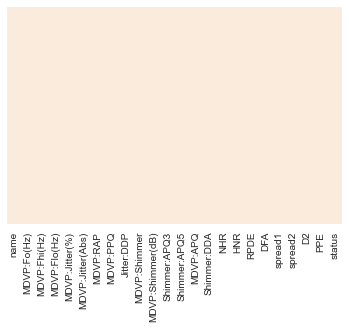

In [34]:
#Missing value Visualization 
sns.heatmap(parkinsons.isna(), yticklabels=False, cbar=False, cmap="rocket_r")

#### Observations
-  From the above heatmap graph we can see that there is no missing value in dataset.

## 6.  Train at least 3 standard classification algorithms - Logistic Regression, Naive Bayes’, SVM, k-NN etc, and note down their accuracies on the test data

### 6.1 Logistic Regression

In [35]:
clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression()

In [36]:
# Fit the model on 30%
# Building a Logistic Regression model on train data
lrg_model = LogisticRegression()

# fitting the model
lrg_model.fit(X_train, y_train)

# predict the response
lrg_y_predict = lrg_model.predict(X_test)

# evaluate accuracy
lrg_score = lrg_model.score(X_test, y_test)
lrg_accuracy = accuracy_score(y_test, lrg_y_predict) # Accuracy of Naïve Bayes Classifier model
lrg_confusion_matrix = metrics.confusion_matrix(y_test, lrg_y_predict)

In [37]:
# check the accuracy on the training set
print('Accuracy of Training Data : ',lrg_model.score(X_train, y_train))
print('Accuracy of Testing Data : ',lrg_model.score(X_test, y_test))

Accuracy of Training Data :  0.875
Accuracy of Testing Data :  0.847457627118644


----------------------Final Analysis of Logistic Regression----------------------------

Logistic Regression Model Accuracy Score : 0.847458

Logistic Regression Confusion Matrix : 
 [[ 8  7]
 [ 2 42]]

True Possitive    =  42
True Negative     =  8
False Possitive   =  7
False Negative    =  2

 Logistic Regression classification Report : 
               precision    recall  f1-score   support

           0       0.80      0.53      0.64        15
           1       0.86      0.95      0.90        44

    accuracy                           0.85        59
   macro avg       0.83      0.74      0.77        59
weighted avg       0.84      0.85      0.84        59


Accuracy    :  0.85
Precision   :  0.86
Recall      :  0.95
F1 score    :  0.9


<Figure size 432x288 with 0 Axes>

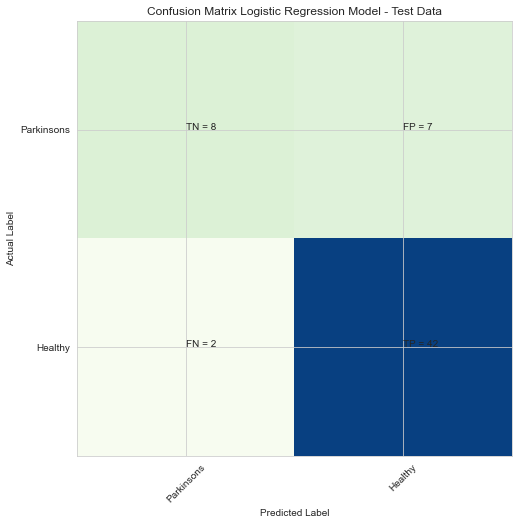

In [38]:
print('----------------------Final Analysis of Logistic Regression----------------------------\n')
# Accuracy
print('Logistic Regression Model Accuracy Score : %f'  % lrg_score)
# Confusion Matrix
print('\nLogistic Regression Confusion Matrix : \n', lrg_confusion_matrix)
print('\nTrue Possitive    = ', lrg_confusion_matrix[1][1])
print('True Negative     = ',   lrg_confusion_matrix[0][0])
print('False Possitive   = ',   lrg_confusion_matrix[0][1])
print('False Negative    = ',   lrg_confusion_matrix[1][0])
print('\n Logistic Regression classification Report : \n',metrics.classification_report(y_test, lrg_y_predict))
lrg_conf_table = lrg_confusion_matrix
a1 = (lrg_conf_table[0,0] + lrg_conf_table[1,1]) / (lrg_conf_table[0,0] + lrg_conf_table[0,1] + lrg_conf_table[1,0] + lrg_conf_table[1,1])
p1 = lrg_conf_table[1,1] / (lrg_conf_table[1,1] + lrg_conf_table[0,1])
r1 = lrg_conf_table[1,1] / (lrg_conf_table[1,1] + lrg_conf_table[1,0])
f1 = (2 * p1 * r1) / (p1 + r1)
print("\nAccuracy    : ",round(a1,2))
print("Precision   : ",round(p1,2))
print("Recall      : ",round(r1,2))
print("F1 score    : ",round(f1,2))

plt.clf()
plt.figure(figsize = (12,8))
plt.imshow(lrg_confusion_matrix, interpolation = 'nearest', cmap = "GnBu")
classNames = ['Parkinsons','Healthy']
plt.title("Confusion Matrix Logistic Regression Model - Test Data")
plt.ylabel("Actual Label")
plt.xlabel("Predicted Label")
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'],['FN','TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i,str(s[i][j])+" = "+str(lrg_confusion_matrix[i][j]))
plt.show()

#### Observations
- From the above accuracy results we see that accuracy is <b>(85 %)</b>. 
- Also from the above confusion metrices we can see that the prediction of patients who are healty and the patients who are having Parkinson's is better.
- <b>Type 1 (False Possitive)</b> errors is high and <b>Type 2 (False Negative)</b> errors is less.

### 6.2 Naïve Bayes

In [39]:
clf1 = GaussianNB()
clf1.fit(X_train, y_train)

GaussianNB()

In [40]:
# Building a Naïve Bayes Classifier on train data
gnb_model = GaussianNB()

# fitting the model
gnb_model.fit(X_train, y_train)

# predict the response
gnb_y_predict = gnb_model.predict(X_test)

# evaluate accuracy
gnb_score = gnb_model.score(X_test, y_test)
gnb_accuracy = accuracy_score(y_test, gnb_y_predict) # Accuracy of Naïve Bayes Classifier model
gnb_confusion_matrix = metrics.confusion_matrix(y_test, gnb_y_predict)

In [41]:
# check the accuracy on the training set
print('Accuracy of Training Data : ',gnb_model.score(X_train, y_train))
print('Accuracy of Testing Data : ',gnb_model.score(X_test, y_test))

Accuracy of Training Data :  0.7132352941176471
Accuracy of Testing Data :  0.7627118644067796


----------------------Final Analysis of Naïve Bayes----------------------------

Naïve Bayes Model Accuracy Score: 0.762712

Naïve Bayes Confusion Matrix: 
 [[15  0]
 [14 30]]

True Possitive    =  30
True Negative     =  15
False Possitive   =  0
False Negative    =  14

 Gaussian Naïve Bayes classification Report : 
               precision    recall  f1-score   support

           0       0.52      1.00      0.68        15
           1       1.00      0.68      0.81        44

    accuracy                           0.76        59
   macro avg       0.76      0.84      0.75        59
weighted avg       0.88      0.76      0.78        59


Accuracy    :  0.76
Precision   :  1.0
Recall      :  0.68
F1 score    :  0.81


<Figure size 432x288 with 0 Axes>

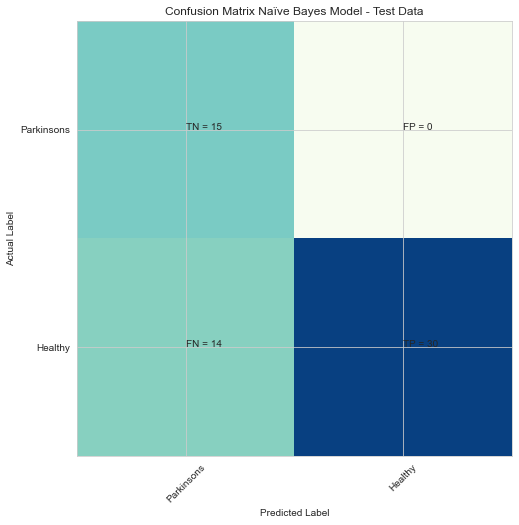

In [42]:
print('----------------------Final Analysis of Naïve Bayes----------------------------\n')
print('Naïve Bayes Model Accuracy Score: %f'  % gnb_accuracy)
print('\nNaïve Bayes Confusion Matrix: \n', gnb_confusion_matrix)
print('\nTrue Possitive    = ', gnb_confusion_matrix[1][1])
print('True Negative     = ',   gnb_confusion_matrix[0][0])
print('False Possitive   = ',   gnb_confusion_matrix[0][1])
print('False Negative    = ',   gnb_confusion_matrix[1][0])
print('\n Gaussian Naïve Bayes classification Report : \n',metrics.classification_report(y_test, gnb_y_predict))
gnb_conf_table = gnb_confusion_matrix
a2 = (gnb_conf_table[0,0] + gnb_conf_table[1,1]) / (gnb_conf_table[0,0] + gnb_conf_table[0,1] + gnb_conf_table[1,0] + gnb_conf_table[1,1])
p2 = gnb_conf_table[1,1] / (gnb_conf_table[1,1] + gnb_conf_table[0,1])
r2 = gnb_conf_table[1,1] / (gnb_conf_table[1,1] + gnb_conf_table[1,0])
f2 = (2 * p2 * r2) / (p2 + r2)
print("\nAccuracy    : ",round(a2,2))
print("Precision   : ",round(p2,2))
print("Recall      : ",round(r2,2))
print("F1 score    : ",round(f2,2))

plt.clf()
plt.figure(figsize = (12,8))
plt.imshow(gnb_confusion_matrix, interpolation = 'nearest', cmap = "GnBu")
classNames = ['Parkinsons','Healthy']
plt.title("Confusion Matrix Naïve Bayes Model - Test Data")
plt.ylabel("Actual Label")
plt.xlabel("Predicted Label")
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'],['FN','TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i,str(s[i][j])+" = "+str(gnb_confusion_matrix[i][j]))
plt.show()

#### Observations
- From the above accuracy results we see that accuracy is <b>(76 %)</b>. 
- Also from the above confusion metrices we can see that the prediction of patients who are healty and the patients who are having Parkinson's is better.
- <b>Type 1 (False Possitive)</b> has no errors and <b>Type 2 (False Negative)</b> errors is very high.

### 6.3 K-Nearest Neighbour

In [43]:
clf2 = KNeighborsClassifier()
clf2.fit(X_train, y_train)

KNeighborsClassifier()

In [44]:
X_std = pd.DataFrame(StandardScaler().fit_transform(park))
X_std.columns = park.columns

In [45]:
# Building a K-NN Classifier on train data
# instantiate learning model (k = 1)
knn = KNeighborsClassifier(n_neighbors = 1)

# fitting the model
knn.fit(X_train, y_train)

# predict the response
y1_pred = knn.predict(X_test)

# evaluate accuracy
print('Accuracy when k = 1 : ',accuracy_score(y_test, y1_pred))

# instantiate learning model (k = 3)
knn = KNeighborsClassifier(n_neighbors=3)

# fitting the model
knn.fit(X_train, y_train)

# predict the response
y3_pred = knn.predict(X_test)

# evaluate accuracy

print('Accuracy when k = 3 : ',accuracy_score(y_test, y3_pred))

# instantiate learning model (k = 5)
knn = KNeighborsClassifier(n_neighbors=5)

# fitting the model
knn.fit(X_train, y_train)

# predict the response
y5_pred = knn.predict(X_test)

# evaluate accuracy
print('Accuracy when k = 5 : ',accuracy_score(y_test, y5_pred))

# instantiate learning model (k = 7)
knn = KNeighborsClassifier(n_neighbors=7)

# fitting the model
knn.fit(X_train, y_train)

# predict the response
y7_pred = knn.predict(X_test)

# evaluate accuracy
print('Accuracy when k = 7 : ',accuracy_score(y_test, y7_pred))

Accuracy when k = 1 :  0.847457627118644
Accuracy when k = 3 :  0.8983050847457628
Accuracy when k = 5 :  0.847457627118644
Accuracy when k = 7 :  0.8135593220338984


In [46]:
myList = list(range(1,20))

# subsetting just the odd ones
neighbors = list(filter(lambda x: x % 2 != 0, myList))

In [47]:
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    # predict the response
    y_pred = knn.predict(X_test)
    # evaluate accuracy
    scores = accuracy_score(y_test, y_pred)
    ac_scores.append(scores)

# changing to misclassification error
MSE = [1 - x for x in ac_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d" % optimal_k)

The optimal number of neighbors is 3


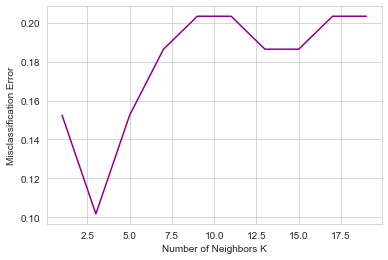

In [48]:
#Plot misclassification error vs k (with k value on X-axis) using matplotlib.
import matplotlib.pyplot as plt
# plot misclassification error vs k
plt.plot(neighbors, MSE, color = 'darkmagenta')
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [49]:
# Building a K-NN Classifier on train data
#Use k=optimal_k as the final model for prediction
knn_model = KNeighborsClassifier(n_neighbors = optimal_k)

# fitting the model
knn_model.fit(X_train, y_train)

# predict the response
knn_y_predict = knn_model.predict(X_test)

# evaluate accuracy
knn_score = knn_model.score(X_test, y_test)
knn_accuracy = accuracy_score(y_test, knn_y_predict) #Accuracy of K-NN model
knn_confusion_matrix = metrics.confusion_matrix(y_test, knn_y_predict)

In [50]:
# check the accuracy on the training set
print('Accuracy of Training Data : ',knn_model.score(X_train, y_train))
print('Accuracy of Testing Data : ',knn_model.score(X_test, y_test))

Accuracy of Training Data :  0.8897058823529411
Accuracy of Testing Data :  0.8983050847457628


----------------------Final Analysis of K-NN----------------------------

K-NN Model Accuracy Score without Experience: 0.898305

K-NN Confusion Matrix Without Experience: 
 [[10  5]
 [ 1 43]]

True Possitive    =  43
True Negative     =  10
False Possitive   =  5
False Negative    =  1

K-NN classification Report : 
               precision    recall  f1-score   support

           0       0.91      0.67      0.77        15
           1       0.90      0.98      0.93        44

    accuracy                           0.90        59
   macro avg       0.90      0.82      0.85        59
weighted avg       0.90      0.90      0.89        59


Accuracy   :  0.9
Precision  :  0.9
Recall     :  0.98
F1 score   :  0.93


<Figure size 432x288 with 0 Axes>

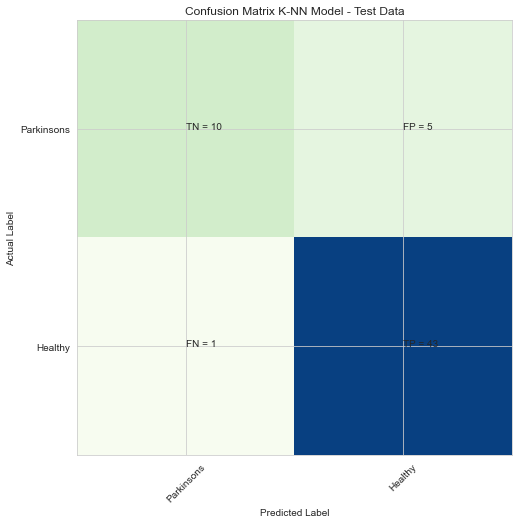

In [51]:
print('----------------------Final Analysis of K-NN----------------------------\n')
print('K-NN Model Accuracy Score without Experience: %f'  % knn_accuracy)
print('\nK-NN Confusion Matrix Without Experience: \n', knn_confusion_matrix)
print('\nTrue Possitive    = ', knn_confusion_matrix[1][1])
print('True Negative     = ',   knn_confusion_matrix[0][0])
print('False Possitive   = ',   knn_confusion_matrix[0][1])
print('False Negative    = ',   knn_confusion_matrix[1][0])
print('\nK-NN classification Report : \n',metrics.classification_report(y_test, knn_y_predict))
knn_conf_table = knn_confusion_matrix
a3 = (knn_conf_table[0,0] + knn_conf_table[1,1]) / (knn_conf_table[0,0] + knn_conf_table[0,1] + knn_conf_table[1,0] + knn_conf_table[1,1])
p3 = knn_conf_table[1,1] / (knn_conf_table[1,1] + knn_conf_table[0,1])
r3 = knn_conf_table[1,1] / (knn_conf_table[1,1] + knn_conf_table[1,0])
f3 = (2 * p3 * r3) / (p3 + r3)
print("\nAccuracy   : ",round(a3,2))
print("Precision  : ",round(p3,2))
print("Recall     : ",round(r3,2))
print("F1 score   : ",round(f3,2))

plt.clf()
plt.figure(figsize = (12,8))
plt.imshow(knn_confusion_matrix, interpolation = 'nearest', cmap = "GnBu")
classNames = ['Parkinsons','Healthy']
plt.title("Confusion Matrix K-NN Model - Test Data")
plt.ylabel("Actual Label")
plt.xlabel("Predicted Label")
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'],['FN','TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i,str(s[i][j])+" = "+str(knn_confusion_matrix[i][j]))
plt.show()

#### Observations
- From the above accuracy results we see that accuracy is <b>(90 %)</b>. 
- Also from the above confusion metrices we can see that the prediction of patients who are healty and the patients who are having Parkinson's is better.
- <b>Type 1 (False Possitive)</b> errors is high and <b>Type 2 (False Negative)</b> errors is less.

### 6.4 Support Vector Machine

In [52]:
# Building a Support Vector Machine on train data
clf3 = SVC(kernel='linear')
clf3.fit(X_train, y_train)

SVC(kernel='linear')

In [53]:
# Building a Support Vector Machine on train data
svc_model= SVC(kernel='linear')

# fitting the model
svc_model.fit(X_train, y_train)

# predict the response
svm_y_predict = svc_model.predict(X_test)

# evaluate accuracy
svm_score = svc_model.score(X_test, y_test)
svm_accuracy = accuracy_score(y_test, svm_y_predict)   #Accuracy of SVM model
svm_confusion_matrix = metrics.confusion_matrix(y_test, svm_y_predict)

In [54]:
# check the accuracy on the training set
print('Accuracy of Training Data : ',svc_model.score(X_train, y_train))
print('Accuracy of Testing Data : ',svc_model.score(X_test, y_test))

Accuracy of Training Data :  0.8897058823529411
Accuracy of Testing Data :  0.864406779661017


----------------------Final Analysis of SVM----------------------------

SVM Model Accuracy Score : 0.864407

SVM Confusion Matrix : 
 [[ 8  7]
 [ 1 43]]

True Possitive    =  43
True Negative     =  8
False Possitive   =  7
False Negative    =  1

SVM classification Report : 
               precision    recall  f1-score   support

           0       0.89      0.53      0.67        15
           1       0.86      0.98      0.91        44

    accuracy                           0.86        59
   macro avg       0.87      0.76      0.79        59
weighted avg       0.87      0.86      0.85        59


Accuracy   :  0.86
Precision  :  0.86
Recall     :  0.98
F1 score   :  0.91


<Figure size 432x288 with 0 Axes>

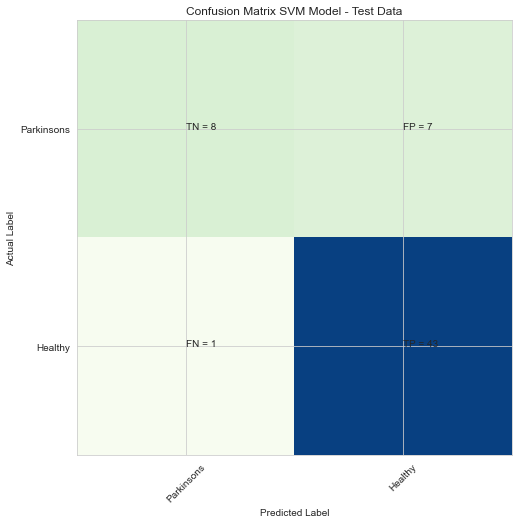

In [55]:
print('----------------------Final Analysis of SVM----------------------------\n')
print('SVM Model Accuracy Score : %f'  % svm_accuracy)
print('\nSVM Confusion Matrix : \n', svm_confusion_matrix)
print('\nTrue Possitive    = ', svm_confusion_matrix[1][1])
print('True Negative     = ',   svm_confusion_matrix[0][0])
print('False Possitive   = ',   svm_confusion_matrix[0][1])
print('False Negative    = ',   svm_confusion_matrix[1][0])
print('\nSVM classification Report : \n',metrics.classification_report(y_test, svm_y_predict))
svm_conf_table = svm_confusion_matrix
a4 = (svm_conf_table[0,0] + svm_conf_table[1,1]) / (svm_conf_table[0,0] + svm_conf_table[0,1] + svm_conf_table[1,0] + svm_conf_table[1,1])
p4 = svm_conf_table[1,1] / (svm_conf_table[1,1] + svm_conf_table[0,1])
r4 = svm_conf_table[1,1] / (svm_conf_table[1,1] + svm_conf_table[1,0])
f4 = (2 * p4 * r4) / (p4 + r4)
print("\nAccuracy   : ",round(a4,2))
print("Precision  : ",round(p4,2))
print("Recall     : ",round(r4,2))
print("F1 score   : ",round(f4,2))

plt.clf()
plt.figure(figsize = (12,8))
plt.imshow(svm_confusion_matrix, interpolation = 'nearest', cmap = "GnBu")
classNames = ['Parkinsons','Healthy']
plt.title("Confusion Matrix SVM Model - Test Data")
plt.ylabel("Actual Label")
plt.xlabel("Predicted Label")
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'],['FN','TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i,str(s[i][j])+" = "+str(svm_confusion_matrix[i][j]))
plt.show()

#### Observations
- From the above accuracy results we see that accuracy is <b>(86 %)</b>. 
- Also from the above confusion metrices we can see that the prediction of patients who are healty and the patients who are having Parkinson's is better.
- <b>Type 1 (False Possitive)</b> errors is high and <b>Type 2 (False Negative)</b> errors is less.

### 6.5 Decision Tree
#### 6.5.1 criterion = 'entropy'

In [56]:
clf4 = DecisionTreeClassifier()
clf4.fit(X_train, y_train)

DecisionTreeClassifier()

In [57]:
# Building a Decision Tree Classifier on train data
dt_model = DecisionTreeClassifier(criterion='entropy')

# fitting the model
dt_model.fit(X_train,y_train)

# predict the response
dt_y_predict = dt_model.predict(X_test)

# evaluate accuracy
dt_score = dt_model.score(X_test, y_test)
dt_accuracy = accuracy_score(y_test, dt_y_predict)   #Accuracy of Decision Tree model
dt_confusion_matrix = metrics.confusion_matrix(y_test, dt_y_predict)

In [58]:
# check the accuracy on the training set
print('Accuracy of Training Data : ',dt_model.score(X_train, y_train))
print('Accuracy of Testing Data : ',dt_model.score(X_test, y_test))

Accuracy of Training Data :  1.0
Accuracy of Testing Data :  0.864406779661017


----------------------Final Analysis of Decision Tree Classifier----------------------------

Decision Tree Classifier (Entropy) Model Accuracy Score : 0.864407

Decision Tree Classifier Confusion Matrix : 
 [[ 8  7]
 [ 1 43]]

True Possitive    =  43
True Negative     =  8
False Possitive   =  7
False Negative    =  1

Decision Tree Classifier Report : 
               precision    recall  f1-score   support

           0       0.89      0.53      0.67        15
           1       0.86      0.98      0.91        44

    accuracy                           0.86        59
   macro avg       0.87      0.76      0.79        59
weighted avg       0.87      0.86      0.85        59


Accuracy   :  0.86
Precision  :  0.86
Recall     :  0.98
F1 score   :  0.91


<Figure size 432x288 with 0 Axes>

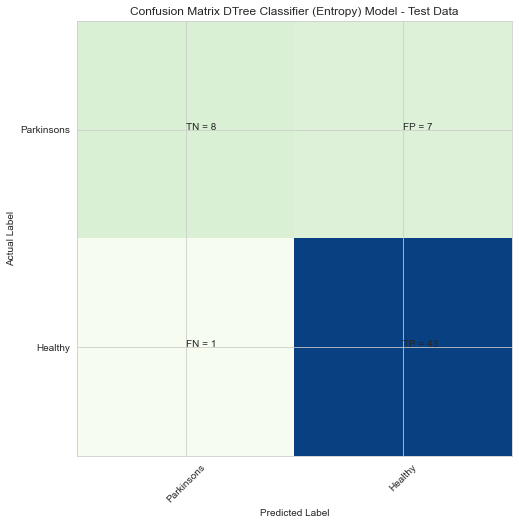

In [59]:
print('----------------------Final Analysis of Decision Tree Classifier----------------------------\n')
print('Decision Tree Classifier (Entropy) Model Accuracy Score : %f'  % dt_accuracy)
print('\nDecision Tree Classifier Confusion Matrix : \n', dt_confusion_matrix)
print('\nTrue Possitive    = ', dt_confusion_matrix[1][1])
print('True Negative     = ',   dt_confusion_matrix[0][0])
print('False Possitive   = ',   dt_confusion_matrix[0][1])
print('False Negative    = ',   dt_confusion_matrix[1][0])
print('\nDecision Tree Classifier Report : \n',metrics.classification_report(y_test, dt_y_predict))
dt_conf_table = dt_confusion_matrix
a5 = (dt_conf_table[0,0] + dt_conf_table[1,1]) / (dt_conf_table[0,0] + dt_conf_table[0,1] + dt_conf_table[1,0] + dt_conf_table[1,1])
p5 = dt_conf_table[1,1] / (dt_conf_table[1,1] + dt_conf_table[0,1])
r5 = dt_conf_table[1,1] / (dt_conf_table[1,1] + dt_conf_table[1,0])
f5 = (2 * p5 * r5) / (p5 + r5)
print("\nAccuracy   : ",round(a5,2))
print("Precision  : ",round(p5,2))
print("Recall     : ",round(r5,2))
print("F1 score   : ",round(f5,2))

plt.clf()
plt.figure(figsize = (12,8))
plt.imshow(dt_confusion_matrix, interpolation = 'nearest', cmap = "GnBu")
classNames = ['Parkinsons','Healthy']
plt.title("Confusion Matrix DTree Classifier (Entropy) Model - Test Data")
plt.ylabel("Actual Label")
plt.xlabel("Predicted Label")
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'],['FN','TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i,str(s[i][j])+" = "+str(dt_confusion_matrix[i][j]))
plt.show()

#### Observations
- From the above accuracy results we see that accuracy is <b>(86 %)</b>. 
- Also from the above confusion metrices we can see that the prediction of patients who are healty and the patients who are having Parkinson's is better.
- <b>Type 1 (False Possitive)</b> errors is very high and <b>Type 2 (False Negative)</b> errors is less.

In [60]:
from sklearn.tree import export_graphviz

train_char_label = ['No', 'Yes']
Park_Tree_File = open('Parkinsons_tree.dot','w')
dot_data = export_graphviz(dt_model, out_file=Park_Tree_File, feature_names = list(X_train), class_names = list(train_char_label))
Park_Tree_File.close()

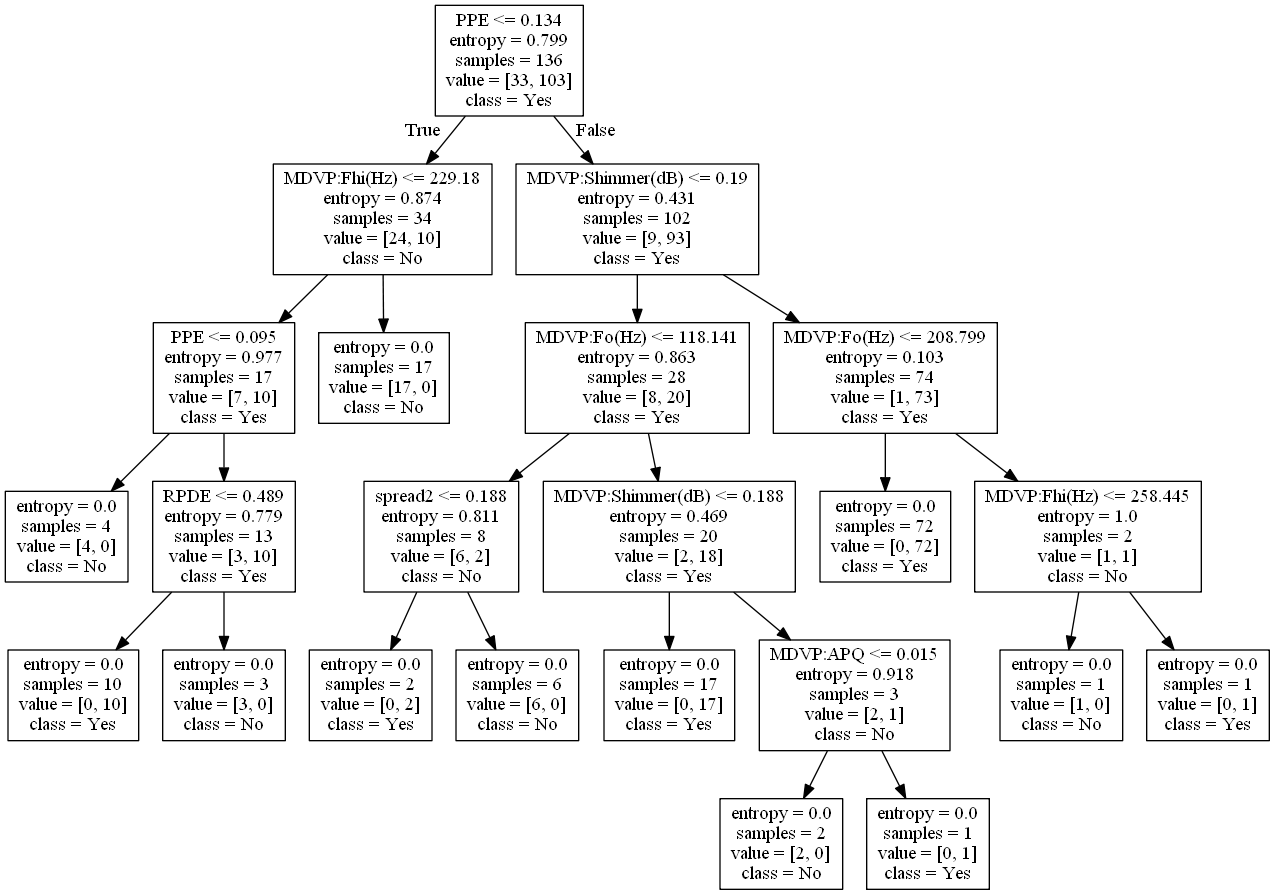

In [61]:
from os import system
from IPython.display import Image

#Works only if "dot" command works on you machine

retCode = system("dot -Tpng Parkinsons_tree.dot -o Parkinsons_tree.png")
if(retCode>0):
    print("system command returning error: "+str(retCode))
else:
    display(Image("Parkinsons_tree.png"))

#### 6.5.2 criterion = 'gini'

In [62]:
# Building a Decision Tree Classifier on train data
dt1_model = DecisionTreeClassifier(criterion = 'gini', random_state=1)

# fitting the model
dt1_model.fit(X_train, y_train)

# predict the response
dt1_y_predict = dt1_model.predict(X_test)

# evaluate accuracy
dt1_score = dt1_model.score(X_test, y_test)
dt1_accuracy = accuracy_score(y_test, dt1_y_predict)   #Accuracy of Decision Tree model
dt1_confusion_matrix = metrics.confusion_matrix(y_test, dt1_y_predict)

In [63]:
# check the accuracy on the training set
print('Accuracy of Training Data : ',dt1_model.score(X_train, y_train))
print('Accuracy of Testing Data : ',dt1_model.score(X_test, y_test))

Accuracy of Training Data :  1.0
Accuracy of Testing Data :  0.8983050847457628


----------------------Final Analysis of Decision Tree Classifier----------------------------

Decision Tree Classifier (Gini) Model Accuracy Score : 0.898305

Decision Tree Classifier Confusion Matrix : 
 [[ 9  6]
 [ 0 44]]

True Possitive    =  44
True Negative     =  9
False Possitive   =  6
False Negative    =  0

Decision Tree Classifier Report : 
               precision    recall  f1-score   support

           0       1.00      0.60      0.75        15
           1       0.88      1.00      0.94        44

    accuracy                           0.90        59
   macro avg       0.94      0.80      0.84        59
weighted avg       0.91      0.90      0.89        59


Accuracy   :  0.9
Precision  :  0.88
Recall     :  1.0
F1 score   :  0.94


<Figure size 432x288 with 0 Axes>

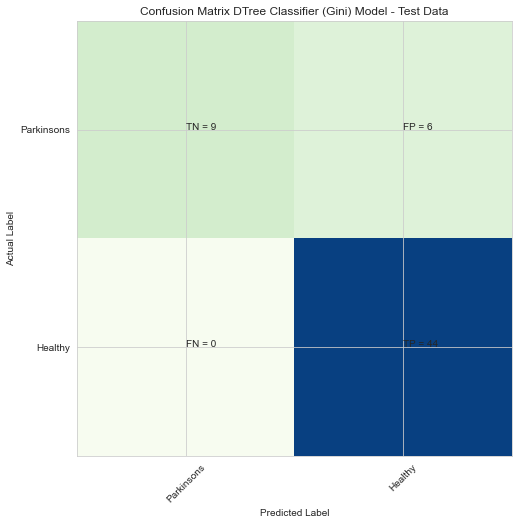

In [64]:
print('----------------------Final Analysis of Decision Tree Classifier----------------------------\n')
print('Decision Tree Classifier (Gini) Model Accuracy Score : %f'  % dt1_accuracy)
print('\nDecision Tree Classifier Confusion Matrix : \n', dt1_confusion_matrix)
print('\nTrue Possitive    = ', dt1_confusion_matrix[1][1])
print('True Negative     = ',   dt1_confusion_matrix[0][0])
print('False Possitive   = ',   dt1_confusion_matrix[0][1])
print('False Negative    = ',   dt1_confusion_matrix[1][0])
print('\nDecision Tree Classifier Report : \n',metrics.classification_report(y_test, dt1_y_predict))
dt1_conf_table = dt1_confusion_matrix
a6 = (dt1_conf_table[0,0] + dt1_conf_table[1,1]) / (dt1_conf_table[0,0] + dt1_conf_table[0,1] + dt1_conf_table[1,0] + dt1_conf_table[1,1])
p6 = dt1_conf_table[1,1] / (dt1_conf_table[1,1] + dt1_conf_table[0,1])
r6 = dt1_conf_table[1,1] / (dt1_conf_table[1,1] + dt1_conf_table[1,0])
f6 = (2 * p6 * r6) / (p6 + r6)
print("\nAccuracy   : ",round(a6,2))
print("Precision  : ",round(p6,2))
print("Recall     : ",round(r6,2))
print("F1 score   : ",round(f6,2))

plt.clf()
plt.figure(figsize = (12,8))
plt.imshow(dt1_confusion_matrix, interpolation = 'nearest', cmap = "GnBu")
classNames = ['Parkinsons','Healthy']
plt.title("Confusion Matrix DTree Classifier (Gini) Model - Test Data")
plt.ylabel("Actual Label")
plt.xlabel("Predicted Label")
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'],['FN','TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i,str(s[i][j])+" = "+str(dt1_confusion_matrix[i][j]))
plt.show()

#### Observations
- From the above accuracy results we see that accuracy is <b>(90 %)</b>. 
- Also from the above confusion metrices we can see that the prediction of patients who are healty and the patients who are having Parkinson's is better.
- <b>Type 1 (False Possitive)</b> errors is very high and <b>Type 2 (False Negative)</b> has no errors.

In [65]:
from sklearn.tree import export_graphviz

train_char_label = ['No', 'Yes']
Park1_Tree_File = open('Parkinsons1_tree.dot','w')
dot_data = export_graphviz(dt1_model, out_file=Park1_Tree_File, feature_names = list(X_train), class_names = list(train_char_label))
Park1_Tree_File.close()

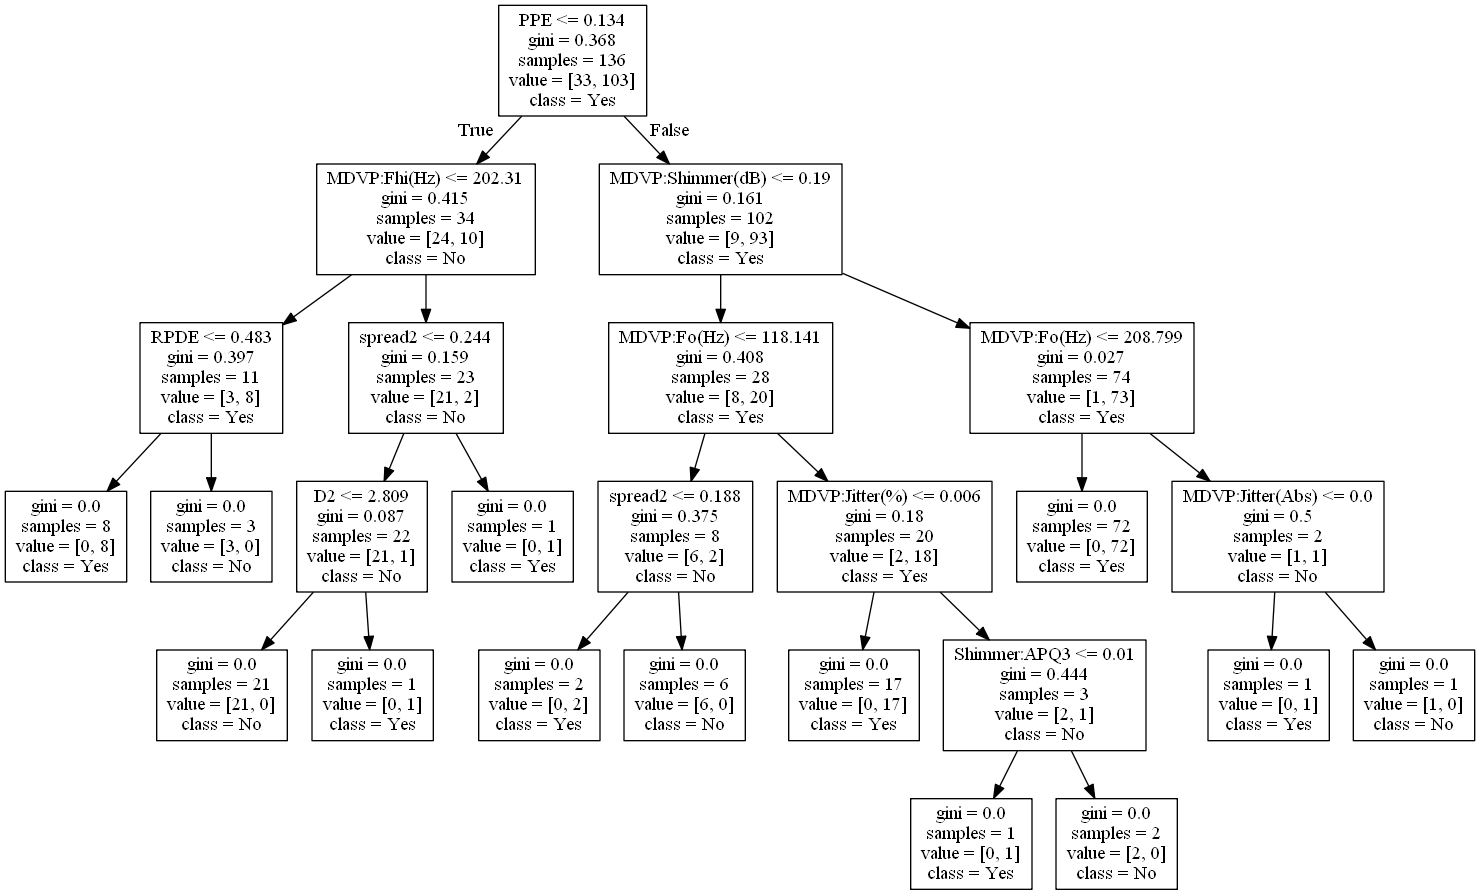

In [66]:
from os import system
from IPython.display import Image

#Works only if "dot" command works on you machine

retCode = system("dot -Tpng Parkinsons1_tree.dot -o Parkinsons1_tree.png")
if(retCode>0):
    print("system command returning error: "+str(retCode))
else:
    display(Image("Parkinsons1_tree.png"))

## 7. Train a meta-classifier and note the accuracy on test data 

In [67]:
# compare ensemble to each baseline classifier
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import StackingClassifier
from matplotlib import pyplot
 
# get the dataset
def get_dataset(): 
    X_train, y_train
    return X_train, y_train

In [68]:
# get a stacking ensemble of models
def get_stacking():
    # define the base models
    level0 = list()
    level0.append(('Logistic Regression', LogisticRegression()))
    level0.append(('K - NN', KNeighborsClassifier()))
    level0.append(('SVM', SVC()))
    level0.append(('Naïve Bayes', GaussianNB()))
    level0.append(('Decision Tree - Entopy', DecisionTreeClassifier(criterion='entropy')))
    level0.append(('Decision Tree - Gini', DecisionTreeClassifier(criterion='gini')))
    # define meta learner model
    level1 = LogisticRegression()
    # define the stacking ensemble
    model = StackingClassifier(estimators=level0, final_estimator=level1, cv=6)
    return model

In [69]:
# get a list of models to evaluate
def get_models():
    models = dict()
    models['Logistic Regression'] = LogisticRegression()
    models['K-NN'] = KNeighborsClassifier()
    models['SVM'] = SVC()
    models['Naïve Bayes'] = GaussianNB()
    models['Decision Tree - Entropy'] = DecisionTreeClassifier(criterion='entropy')
    models['Decision Tree - Gini'] = DecisionTreeClassifier(criterion='gini')
    models['Stacking'] = get_stacking()
    return models

In [70]:
# evaluate a give model using cross-validation
def evaluate_model(model, X_train, y_train):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores

>Logistic Regression 0.853 (0.071)
>K-NN 0.797 (0.090)
>SVM 0.824 (0.054)
>Naïve Bayes 0.702 (0.105)
>Decision Tree - Entropy 0.807 (0.072)
>Decision Tree - Gini 0.826 (0.063)
>Stacking 0.834 (0.074)


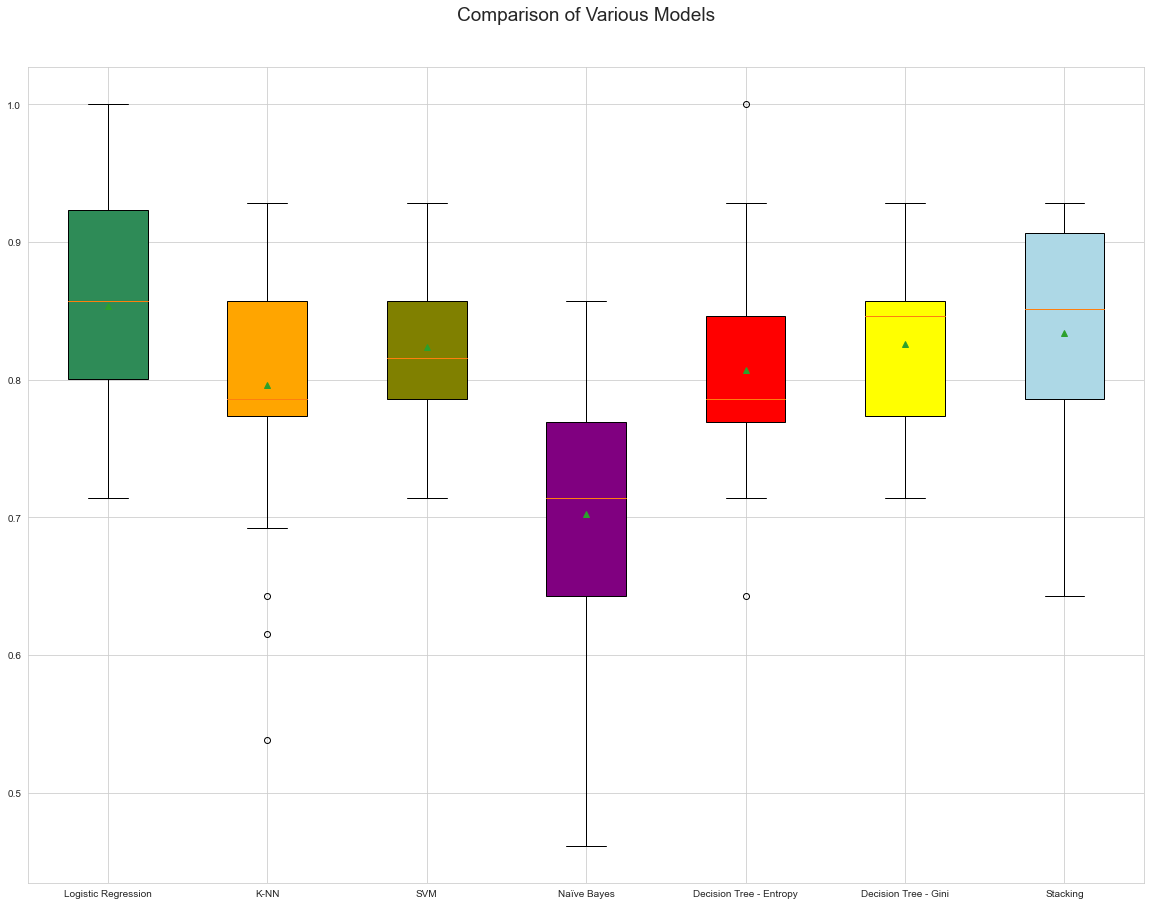

In [71]:
# define dataset
X, y = get_dataset()

# get the models to evaluate
models = get_models()

# evaluate the models and store results
results, names = list(), list()

for name, model in models.items():
    scores = evaluate_model(model, X_train, y_train)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

# plot model performance for comparison
plt.figure(figsize=(20, 15))
plt.title('Comparison of Various Models', y=1.05, size=19)
box = pyplot.boxplot(results, labels=names, showmeans=True,patch_artist=True)
colors = ['seagreen','orange', 'olive', 'purple', 'red', 'yellow','lightblue']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
pyplot.show()

>Logistic Regression 0.786 (0.160)
>K-NN 0.740 (0.151)
>SVM 0.736 (0.090)
>Naïve Bayes 0.776 (0.131)
>Decision Tree - Entropy 0.802 (0.155)
>Decision Tree - Gini 0.819 (0.149)
>Stacking 0.791 (0.170)


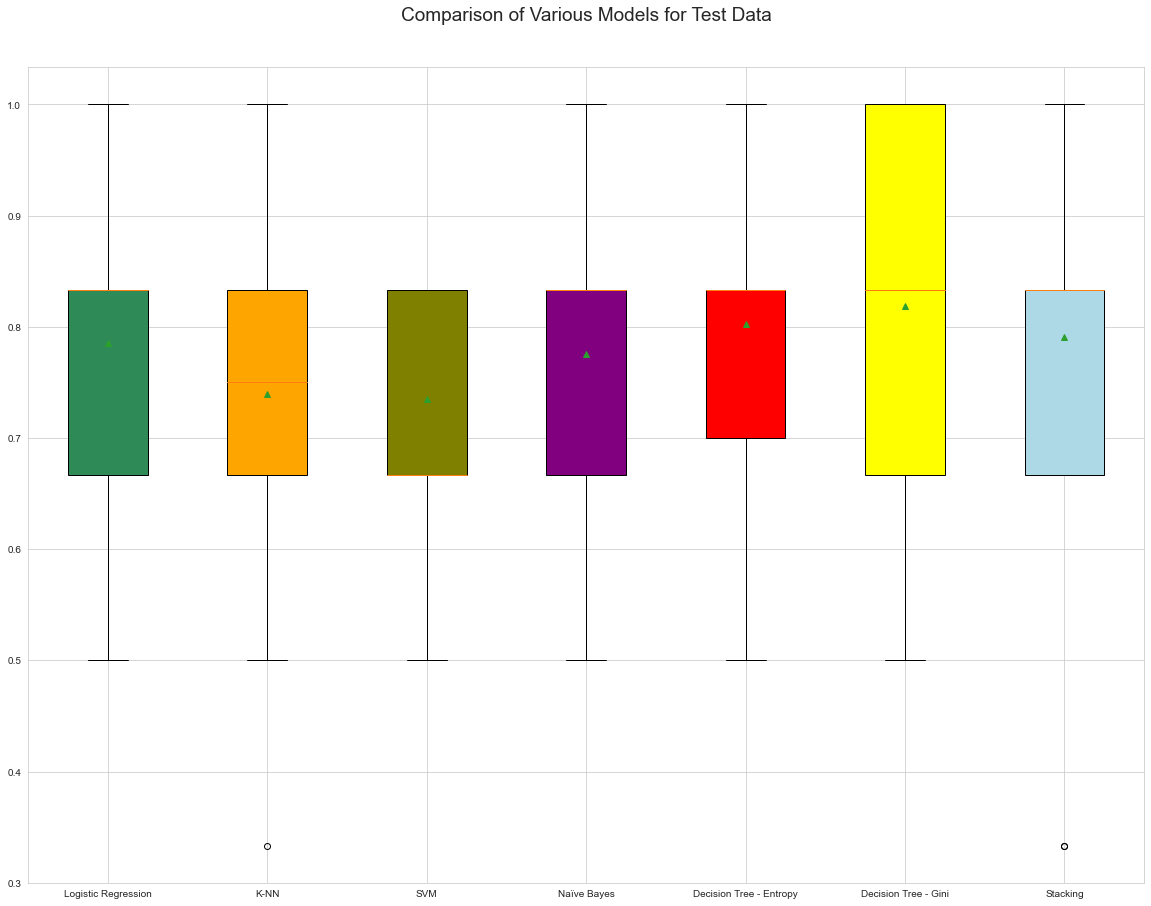

In [72]:
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X_test, y_test)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

# plot model performance for comparison
plt.figure(figsize=(20, 15))
plt.title('Comparison of Various Models for Test Data', y=1.05, size=19)
box = pyplot.boxplot(results, labels=names, showmeans=True, patch_artist=True)
colors = ['seagreen','orange', 'olive', 'purple', 'red', 'yellow','lightblue']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
pyplot.show()

#### Observations
- Decision Tree Classifier shows the highest Accuracy followed by Stacking.

## 8. Train at least one standard Ensemble model - Random forest, Bagging, Boosting etc, and note the accuracy 
### 8.1 Random Forest Classifier

In [73]:
rfcl = RandomForestClassifier(n_estimators = 50, random_state=1,max_features=12)
rfcl = rfcl.fit(X_train, y_train)

In [74]:
# Building a Random Forest Classifier model on train data
rfc_model = RandomForestClassifier(n_estimators = 50, random_state=1,max_features=12)

# fitting the model
rfc_model.fit(X_train, y_train)

# predict the response
rfc_y_predict = rfc_model.predict(X_test)

# evaluate accuracy
rfc_model_score = rfc_model.score(X_test, y_test)
rfc_accuracy = rfc_model_score  # Accuracy of Random Forest Classifier model
rfc_confusion_matrix = metrics.confusion_matrix(y_test, rfc_y_predict)

In [75]:
# check the accuracy on the training set
print('Accuracy of Training Data : ',rfc_model.score(X_train, y_train))
print('Accuracy of Testing Data : ',rfc_model.score(X_test, y_test))

Accuracy of Training Data :  1.0
Accuracy of Testing Data :  0.9322033898305084


----------------------Final Analysis of Random Forest Classifier----------------------------

Random Forest Classifier Model Accuracy Score : 0.932203

Random Forest Classifier Confusion Matrix : 
 [[11  4]
 [ 0 44]]

True Possitive    =  44
True Negative     =  11
False Possitive   =  4
False Negative    =  0

 Random Forest Classifier Model classification Report : 
               precision    recall  f1-score   support

           0       1.00      0.73      0.85        15
           1       0.92      1.00      0.96        44

    accuracy                           0.93        59
   macro avg       0.96      0.87      0.90        59
weighted avg       0.94      0.93      0.93        59


Accuracy    :  0.93
Precision   :  0.92
Recall      :  1.0
F1 score    :  0.96


<Figure size 432x288 with 0 Axes>

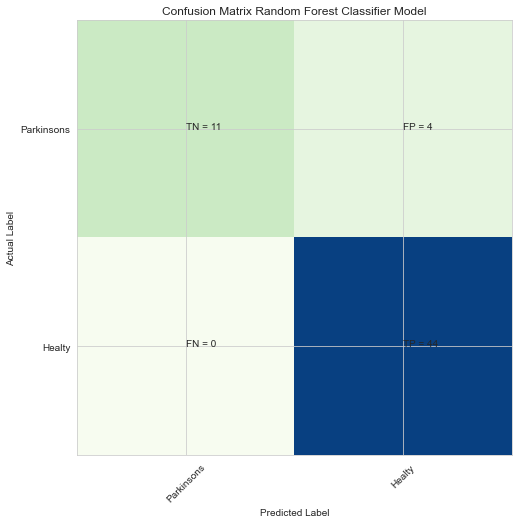

In [76]:
print('----------------------Final Analysis of Random Forest Classifier----------------------------\n')
print('Random Forest Classifier Model Accuracy Score : %f'  % rfc_accuracy)
print('\nRandom Forest Classifier Confusion Matrix : \n', rfc_confusion_matrix)
print('\nTrue Possitive    = ', rfc_confusion_matrix[1][1])
print('True Negative     = ',   rfc_confusion_matrix[0][0])
print('False Possitive   = ',   rfc_confusion_matrix[0][1])
print('False Negative    = ',   rfc_confusion_matrix[1][0])

print('\n Random Forest Classifier Model classification Report : \n',metrics.classification_report(y_test, rfc_y_predict))
rfc_conf_table = rfc_confusion_matrix
a7 = (rfc_conf_table[0,0] + rfc_conf_table[1,1]) / (rfc_conf_table[0,0] + rfc_conf_table[0,1] + rfc_conf_table[1,0] + rfc_conf_table[1,1])
p7 = rfc_conf_table[1,1] / (rfc_conf_table[1,1] + rfc_conf_table[0,1])
r7 = rfc_conf_table[1,1] / (rfc_conf_table[1,1] + rfc_conf_table[1,0])
f7 = (2 * p7 * r7) / (p7 + r7)
print("\nAccuracy    : ",round(a7,2))
print("Precision   : ",round(p7,2))
print("Recall      : ",round(r7,2))
print("F1 score    : ",round(f7,2))

plt.clf()
plt.figure(figsize = (12,8))
plt.imshow(rfc_confusion_matrix, interpolation = 'nearest', cmap = "GnBu")
classNames = ['Parkinsons','Healty']
plt.title("Confusion Matrix Random Forest Classifier Model")
plt.ylabel("Actual Label")
plt.xlabel("Predicted Label")
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'],['FN','TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i,str(s[i][j])+" = "+str(rfc_confusion_matrix[i][j]))
plt.show()

#### Observations
- From the above accuracy results we see that accuracy is <b>(93 %)</b>. 
- Also from the above confusion metrices we can see that the prediction of patients who are healty and the patients who are having Parkinson's is better.
- <b>Type 1 (False Possitive)</b> errors is high and <b>Type 2 (False Negative)</b> has no errors.

### 8.2 Bagging

In [77]:
bgcl = BaggingClassifier(base_estimator=dt_model, n_estimators=50,random_state=1)
#bgcl = BaggingClassifier(n_estimators=50,random_state=1)
bgcl = bgcl.fit(X_train, y_train)

In [78]:
# Building a Bagging Classifier model on train data
bgcl_model = BaggingClassifier(base_estimator=dt_model, n_estimators=50,random_state=1)

# fitting the model
bgcl_model.fit(X_train, y_train)

# predict the response
bgcl_y_predict = bgcl_model.predict(X_test)

# evaluate accuracy
bgcl_model_score = bgcl_model.score(X_test, y_test)
bgcl_accuracy = bgcl_model_score  # Accuracy of Bagging Classifier model
bgcl_confusion_matrix = metrics.confusion_matrix(y_test, bgcl_y_predict)

In [79]:
# check the accuracy on the training set
print('Accuracy of Training Data : ',bgcl_model.score(X_train, y_train))
print('Accuracy of Testing Data : ',bgcl_model.score(X_test, y_test))

Accuracy of Training Data :  1.0
Accuracy of Testing Data :  0.9491525423728814


----------------------Final Analysis of Bagging Classifier----------------------------

Bagging Classifier Model Accuracy Score : 0.949153

Bagging Classifier Confusion Matrix : 
 [[12  3]
 [ 0 44]]

True Possitive    =  44
True Negative     =  12
False Possitive   =  3
False Negative    =  0

 Bagging Classifier Model classification Report : 
               precision    recall  f1-score   support

           0       1.00      0.80      0.89        15
           1       0.94      1.00      0.97        44

    accuracy                           0.95        59
   macro avg       0.97      0.90      0.93        59
weighted avg       0.95      0.95      0.95        59


Accuracy    :  0.95
Precision   :  0.94
Recall      :  1.0
F1 score    :  0.97


<Figure size 432x288 with 0 Axes>

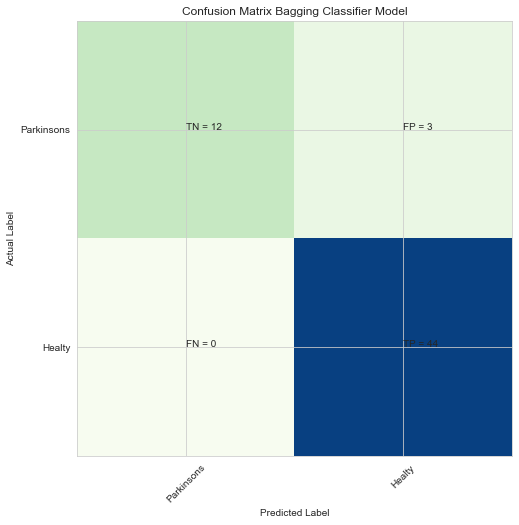

In [80]:
print('----------------------Final Analysis of Bagging Classifier----------------------------\n')
print('Bagging Classifier Model Accuracy Score : %f'  % bgcl_accuracy)
print('\nBagging Classifier Confusion Matrix : \n', bgcl_confusion_matrix)
print('\nTrue Possitive    = ', bgcl_confusion_matrix[1][1])
print('True Negative     = ',   bgcl_confusion_matrix[0][0])
print('False Possitive   = ',   bgcl_confusion_matrix[0][1])
print('False Negative    = ',   bgcl_confusion_matrix[1][0])

print('\n Bagging Classifier Model classification Report : \n',metrics.classification_report(y_test, bgcl_y_predict))
bgcl_conf_table = bgcl_confusion_matrix
a8 = (bgcl_conf_table[0,0] + bgcl_conf_table[1,1]) / (bgcl_conf_table[0,0] + bgcl_conf_table[0,1] + bgcl_conf_table[1,0] + bgcl_conf_table[1,1])
p8 = bgcl_conf_table[1,1] / (bgcl_conf_table[1,1] + bgcl_conf_table[0,1])
r8 = bgcl_conf_table[1,1] / (bgcl_conf_table[1,1] + bgcl_conf_table[1,0])
f8 = (2 * p8 * r8) / (p8 + r8)
print("\nAccuracy    : ",round(a8,2))
print("Precision   : ",round(p8,2))
print("Recall      : ",round(r8,2))
print("F1 score    : ",round(f8,2))

plt.clf()
plt.figure(figsize = (12,8))
plt.imshow(bgcl_confusion_matrix, interpolation = 'nearest', cmap = "GnBu")
classNames = ['Parkinsons','Healty']
plt.title("Confusion Matrix Bagging Classifier Model")
plt.ylabel("Actual Label")
plt.xlabel("Predicted Label")
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'],['FN','TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i,str(s[i][j])+" = "+str(bgcl_confusion_matrix[i][j]))
plt.show()

#### Observations
- From the above accuracy results we see that accuracy is <b>(95 %)</b>. 
- Also from the above confusion metrices we can see that the prediction of patients who are healty and the patients who are having Parkinson's is better.
- <b>Type 1 (False Possitive)</b> errors is less and <b>Type 2 (False Negative)</b> has no errors.

### 8.3 Boosting
#### 8.3.1 AdaBoosting

In [81]:
abcl = AdaBoostClassifier(n_estimators=10, random_state=1)
#abcl = AdaBoostClassifier( n_estimators=50,random_state=1)
abcl = abcl.fit(X_train, y_train)

In [82]:
# Building a AdaBoosting Classifier model on train data
abcl_model = AdaBoostClassifier(n_estimators=10, random_state=1)

# fitting the model
abcl_model.fit(X_train, y_train)

# predict the response
abcl_y_predict = abcl_model.predict(X_test)

# evaluate accuracy
abcl_model_score = abcl_model.score(X_test, y_test)
abcl_accuracy = abcl_model_score  # Accuracy of AdaBoosting Classifier model
abcl_confusion_matrix = metrics.confusion_matrix(y_test, abcl_y_predict)

In [83]:
# check the accuracy on the training set
print('Accuracy of Training Data : ',abcl_model.score(X_train, y_train))
print('Accuracy of Testing Data : ',abcl_model.score(X_test, y_test))

Accuracy of Training Data :  0.9632352941176471
Accuracy of Testing Data :  0.847457627118644


----------------------Final Analysis of AdaBoosting Classifier----------------------------

AdaBoosting Classifier Model Accuracy Score : 0.847458

AdaBoosting Classifier Confusion Matrix : 
 [[ 9  6]
 [ 3 41]]

True Possitive    =  41
True Negative     =  9
False Possitive   =  6
False Negative    =  3

 AdaBoosting Classifier Model classification Report : 
               precision    recall  f1-score   support

           0       0.75      0.60      0.67        15
           1       0.87      0.93      0.90        44

    accuracy                           0.85        59
   macro avg       0.81      0.77      0.78        59
weighted avg       0.84      0.85      0.84        59


Accuracy    :  0.85
Precision   :  0.87
Recall      :  0.93
F1 score    :  0.9


<Figure size 432x288 with 0 Axes>

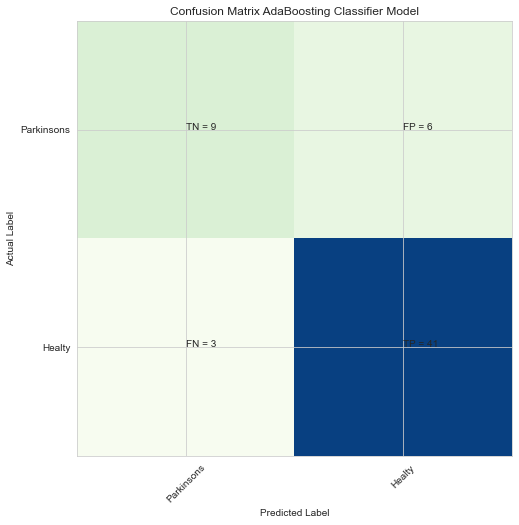

In [84]:
print('----------------------Final Analysis of AdaBoosting Classifier----------------------------\n')
print('AdaBoosting Classifier Model Accuracy Score : %f'  % abcl_accuracy)
print('\nAdaBoosting Classifier Confusion Matrix : \n', abcl_confusion_matrix)
print('\nTrue Possitive    = ', abcl_confusion_matrix[1][1])
print('True Negative     = ',   abcl_confusion_matrix[0][0])
print('False Possitive   = ',   abcl_confusion_matrix[0][1])
print('False Negative    = ',   abcl_confusion_matrix[1][0])

print('\n AdaBoosting Classifier Model classification Report : \n',metrics.classification_report(y_test, abcl_y_predict))
abcl_conf_table = abcl_confusion_matrix
a9 = (abcl_conf_table[0,0] + abcl_conf_table[1,1]) / (abcl_conf_table[0,0] + abcl_conf_table[0,1] + abcl_conf_table[1,0] + abcl_conf_table[1,1])
p9 = abcl_conf_table[1,1] / (abcl_conf_table[1,1] + abcl_conf_table[0,1])
r9 = abcl_conf_table[1,1] / (abcl_conf_table[1,1] + abcl_conf_table[1,0])
f9 = (2 * p9 * r9) / (p9 + r9)
print("\nAccuracy    : ",round(a9,2))
print("Precision   : ",round(p9,2))
print("Recall      : ",round(r9,2))
print("F1 score    : ",round(f9,2))


plt.clf()
plt.figure(figsize = (12,8))
plt.imshow(abcl_confusion_matrix, interpolation = 'nearest', cmap = "GnBu")
classNames = ['Parkinsons','Healty']
plt.title("Confusion Matrix AdaBoosting Classifier Model")
plt.ylabel("Actual Label")
plt.xlabel("Predicted Label")
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'],['FN','TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i,str(s[i][j])+" = "+str(abcl_confusion_matrix[i][j]))
plt.show()

#### Observations
- From the above accuracy results we see that accuracy is <b>(85 %)</b>. 
- Also from the above confusion metrices we can see that the prediction of patients who are healty and the patients who are having Parkinson's is better.
- <b>Type 1 (False Possitive)</b> rrors is high and <b>Type 2 (False Negative)</b> errors is less.

#### 8.3.2 GradientBoost

In [85]:
gbcl = GradientBoostingClassifier(n_estimators = 50,random_state=1)
gbcl = gbcl.fit(X_train, y_train)

In [86]:
# Building a GradientBoost Classifier model on train data
gbcl_model = GradientBoostingClassifier(n_estimators = 50,random_state=1)

# fitting the model
gbcl_model.fit(X_train, y_train)

# predict the response
gbcl_y_predict = gbcl_model.predict(X_test)

# evaluate accuracy
gbcl_model_score = gbcl_model.score(X_test, y_test)
gbcl_accuracy = gbcl_model_score  # Accuracy of GradientBoost Classifier model
gbcl_confusion_matrix = metrics.confusion_matrix(y_test, gbcl_y_predict)

In [87]:
# check the accuracy on the training set
print('Accuracy of Training Data : ',gbcl_model.score(X_train, y_train))
print('Accuracy of Testing Data : ',gbcl_model.score(X_test, y_test))

Accuracy of Training Data :  1.0
Accuracy of Testing Data :  0.9322033898305084


----------------------Final Analysis of GradientBoost Classifier----------------------------

GradientBoost Classifier Model Accuracy Score : 0.932203

GradientBoost Classifier Confusion Matrix : 
 [[11  4]
 [ 0 44]]

True Possitive    =  44
True Negative     =  11
False Possitive   =  4
False Negative    =  0

 GradientBoost Classifier Model classification Report : 
               precision    recall  f1-score   support

           0       1.00      0.73      0.85        15
           1       0.92      1.00      0.96        44

    accuracy                           0.93        59
   macro avg       0.96      0.87      0.90        59
weighted avg       0.94      0.93      0.93        59


Accuracy    :  0.93
Precision   :  0.92
Recall      :  1.0
F1 score    :  0.96


<Figure size 432x288 with 0 Axes>

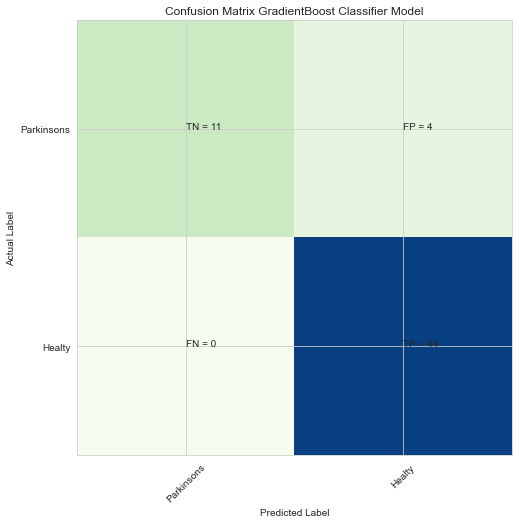

In [88]:
print('----------------------Final Analysis of GradientBoost Classifier----------------------------\n')
print('GradientBoost Classifier Model Accuracy Score : %f'  % gbcl_accuracy)
print('\nGradientBoost Classifier Confusion Matrix : \n', gbcl_confusion_matrix)
print('\nTrue Possitive    = ', gbcl_confusion_matrix[1][1])
print('True Negative     = ',   gbcl_confusion_matrix[0][0])
print('False Possitive   = ',   gbcl_confusion_matrix[0][1])
print('False Negative    = ',   gbcl_confusion_matrix[1][0])

print('\n GradientBoost Classifier Model classification Report : \n',metrics.classification_report(y_test, gbcl_y_predict))
gbcl_conf_table = gbcl_confusion_matrix
a10 = (gbcl_conf_table[0,0] + gbcl_conf_table[1,1]) / (gbcl_conf_table[0,0] + gbcl_conf_table[0,1] + gbcl_conf_table[1,0] + gbcl_conf_table[1,1])
p10 = gbcl_conf_table[1,1] / (gbcl_conf_table[1,1] + gbcl_conf_table[0,1])
r10 = gbcl_conf_table[1,1] / (gbcl_conf_table[1,1] + gbcl_conf_table[1,0])
f10 = (2 * p10 * r10) / (p10 + r10)
print("\nAccuracy    : ",round(a10,2))
print("Precision   : ",round(p10,2))
print("Recall      : ",round(r10,2))
print("F1 score    : ",round(f10,2))

plt.clf()
plt.figure(figsize = (12,8))
plt.imshow(gbcl_confusion_matrix, interpolation = 'nearest', cmap = "GnBu")
classNames = ['Parkinsons','Healty']
plt.title("Confusion Matrix GradientBoost Classifier Model")
plt.ylabel("Actual Label")
plt.xlabel("Predicted Label")
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'],['FN','TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i,str(s[i][j])+" = "+str(gbcl_confusion_matrix[i][j]))
plt.show()

#### Observations
- From the above accuracy results we see that accuracy is <b>(93 %)</b>. 
- Also from the above confusion metrices we can see that the prediction of patients who are healty and the patients who are having Parkinson's is better.
- <b>Type 1 (False Possitive)</b> rrors is high and <b>Type 2 (False Negative)</b> has no errors.

## 9. Compare all the models (minimum 5) and pick the best one among them 

### 9.1 Result of Ensemble Classification Models

In [89]:
mdllsts = []

mdllsts.append(['Decision Tree - Entropy', dt_model.score(X_train, y_train) * 100, dt_model.score(X_test, y_test) * 100, r5 * 100, p5 * 100])
mdllsts.append(['Decision Tree - Gini', dt1_model.score(X_train, y_train) * 100, dt1_model.score(X_test, y_test) * 100, r6 * 100, p6 * 100])
mdllsts.append(['Random Forest Classifier',rfc_model.score(X_train, y_train) * 100, rfc_model.score(X_test, y_test) * 100, r7 * 100, p7 * 100])
mdllsts.append(['Bagging Classifier', bgcl_model.score(X_train, y_train) * 100, bgcl_model.score(X_test, y_test) * 100, r8 * 100, p8 * 100])
mdllsts.append(['AdaBoost Classifier', abcl_model.score(X_train, y_train) * 100, abcl_model.score(X_test, y_test) * 100, r9 * 100, p9 * 100])
mdllsts.append(['Gradient Boosting Classifier', gbcl_model.score(X_train, y_train) * 100, gbcl_model.score(X_test, y_test) * 100, r10 * 100, p10 * 100])

mdl_e_df = pd.DataFrame(mdllsts, columns = ['Model', 'Accuracy Score of Training Data', 'Accuracy Score of Test Data', 'Recall Score', 'Precision Score'])
mdl_e_df

Model  Accuracy Score of Training Data  \
0       Decision Tree - Entropy                       100.000000   
1          Decision Tree - Gini                       100.000000   
2      Random Forest Classifier                       100.000000   
3            Bagging Classifier                       100.000000   
4           AdaBoost Classifier                        96.323529   
5  Gradient Boosting Classifier                       100.000000   

   Accuracy Score of Test Data  Recall Score  Precision Score  
0                    86.440678     97.727273        86.000000  
1                    89.830508    100.000000        88.000000  
2                    93.220339    100.000000        91.666667  
3                    94.915254    100.000000        93.617021  
4                    84.745763     93.181818        87.234043  
5                    93.220339    100.000000        91.666667

#### Observaions
- The Decision Tree (Criterion - Entropy) Classifier gives the best accuracy score followed by Random Forest Classifier and Random Forest Classifier.

### 9.2 Result Summary of all Classification Models

In [90]:
modellsts = []

modellsts.append(['Logistic Regression', lrg_model.score(X_train, y_train) * 100, lrg_model.score(X_test, y_test) * 100, r1 * 100, p1 * 100])
modellsts.append(['Gaussian Naïve Bayes', gnb_model.score(X_train, y_train) * 100, gnb_model.score(X_test, y_test) * 100, r2 * 100, p2 * 100])
modellsts.append(['K-Nearest Neighbour', knn_model.score(X_train, y_train) * 100, knn_model.score(X_test, y_test) * 100, r3 * 100, p3 * 100])
modellsts.append(['Support Vector Classifier', svc_model.score(X_train, y_train) * 100, svc_model.score(X_test, y_test) * 100, r4 * 100, p4 * 100])
modellsts.append(['Decision Tree - Entropy', dt_model.score(X_train, y_train) * 100, dt_model.score(X_test, y_test) * 100, r5 * 100, p5 * 100])
modellsts.append(['Decision Tree - Gini', dt1_model.score(X_train, y_train) * 100, dt1_model.score(X_test, y_test) * 100, r6 * 100, p6 * 100])
modellsts.append(['Random Forest Classifier',rfc_model.score(X_train, y_train) * 100, rfc_model.score(X_test, y_test) * 100, r7 * 100, p7 * 100])
modellsts.append(['Bagging Classifier', bgcl_model.score(X_train, y_train) * 100, bgcl_model.score(X_test, y_test) * 100, r8 * 100, p8 * 100])
modellsts.append(['AdaBoost Classifier', abcl_model.score(X_train, y_train) * 100, abcl_model.score(X_test, y_test) * 100, r9 * 100, p9 * 100])
modellsts.append(['Gradient Boosting Classifier', gbcl_model.score(X_train, y_train) * 100, gbcl_model.score(X_test, y_test) * 100, r10 * 100, p10 * 100])

mdl_df = pd.DataFrame(modellsts, columns = ['Model', 'Accuracy Score of Training Data', 'Accuracy Score of Test Data', 'Recall Score', 'Precision Score'])
mdl_df

Model  Accuracy Score of Training Data  \
0           Logistic Regression                        87.500000   
1          Gaussian Naïve Bayes                        71.323529   
2           K-Nearest Neighbour                        88.970588   
3     Support Vector Classifier                        88.970588   
4       Decision Tree - Entropy                       100.000000   
5          Decision Tree - Gini                       100.000000   
6      Random Forest Classifier                       100.000000   
7            Bagging Classifier                       100.000000   
8           AdaBoost Classifier                        96.323529   
9  Gradient Boosting Classifier                       100.000000   

   Accuracy Score of Test Data  Recall Score  Precision Score  
0                    84.745763     95.454545        85.714286  
1                    76.271186     68.181818       100.000000  
2                    89.830508     97.727273        89.583333  
3                    86.440678     97.727273        86.000000  
4                    86.440678     97.727273        86.000000  
5                    89.830508    100.000000        88.000000  
6                    93.220339    100.000000        91.666667  
7                    94.915254    100.000000        93.617021  
8                    84.745763     93.181818        87.234043  
9                    93.220339    100.000000        91.666667

### 9.3 Receiver Operating Characteristic (ROC) Curve



Receiver Operating Characteristic (ROC) curve to evalute the classifier output quality.  If area of curve is closer to 1 which means better the model and if area of curve is closer to 0 which means poor the model.


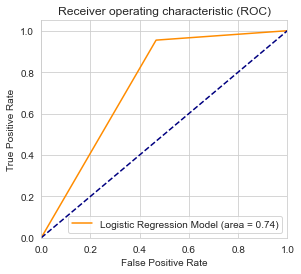

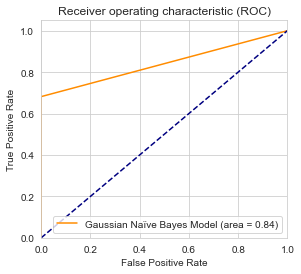

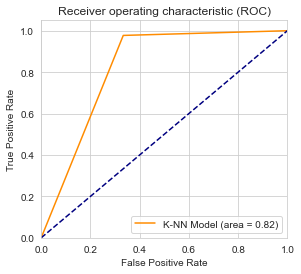

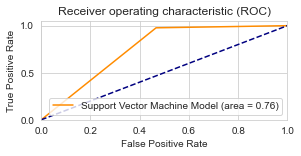

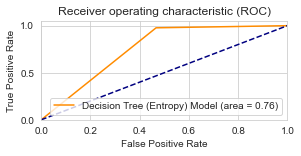

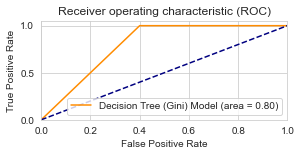

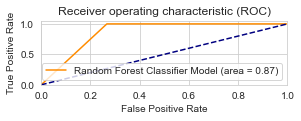

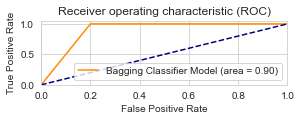

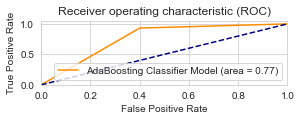

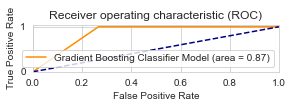

In [91]:
from sklearn.metrics import roc_curve, roc_auc_score
print('\n\nReceiver Operating Characteristic (ROC) curve to evalute the classifier output quality.  If area of curve is closer to 1 which means better the model and if area of curve is closer to 0 which means poor the model.')

lrg_fpr, lrg_tpr, lrg_threshold = metrics.roc_curve(y_test, lrg_y_predict)
lrg_roc_auc = metrics.roc_auc_score(y_test, lrg_y_predict)
fig1_graph = plt.figure(figsize=(15,4))
fig1_graph.add_subplot(1,3,1)
plt.plot(lrg_fpr, lrg_tpr, label='Logistic Regression Model (area = %0.2f)' % lrg_roc_auc,color='darkorange')
plt.plot([0, 1], [0, 1],color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC)')
plt.legend(loc="lower right")

gnb_fpr, gnb_tpr, gnb_threshold = metrics.roc_curve(y_test, gnb_y_predict)
gnb_roc_auc = metrics.roc_auc_score(y_test, gnb_y_predict)
fig1_graph = plt.figure(figsize=(15,4))
fig1_graph.add_subplot(1,3,2)
plt.plot(gnb_fpr, gnb_tpr, label='Gaussian Naïve Bayes Model (area = %0.2f)' % gnb_roc_auc,color='darkorange')
plt.plot([0, 1], [0, 1],color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC)')
plt.legend(loc="lower right")

knn_fpr, knn_tpr, knn_threshold = metrics.roc_curve(y_test, knn_y_predict)
knn_roc_auc = metrics.roc_auc_score(y_test, knn_y_predict)
fig1_graph = plt.figure(figsize=(15,4))
fig1_graph.add_subplot(1,3,3)
plt.plot(knn_fpr, knn_tpr, label='K-NN Model (area = %0.2f)' % knn_roc_auc,color='darkorange')
plt.plot([0, 1], [0, 1],color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC)')
plt.legend(loc="lower right")

svm_fpr, svm_tpr, svm_threshold = metrics.roc_curve(y_test, svm_y_predict)
svm_roc_auc = metrics.roc_auc_score(y_test, svm_y_predict)
fig1_graph = plt.figure(figsize=(15,4))
fig1_graph.add_subplot(2,3,1)
plt.plot(svm_fpr, svm_tpr, label='Support Vector Machine Model (area = %0.2f)' % svm_roc_auc,color='darkorange')
plt.plot([0, 1], [0, 1],color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC)')
plt.legend(loc="lower right")

dt_fpr, dt_tpr, dt_threshold = metrics.roc_curve(y_test, dt_y_predict)
dt_roc_auc = metrics.roc_auc_score(y_test, dt_y_predict)
fig1_graph = plt.figure(figsize=(15,4))
fig1_graph.add_subplot(2,3,2)
plt.plot(dt_fpr, dt_tpr, label='Decision Tree (Entropy) Model (area = %0.2f)' % dt_roc_auc,color='darkorange')
plt.plot([0, 1], [0, 1],color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC)')
plt.legend(loc="lower right")

dt1_fpr, dt1_tpr, dt1_threshold = metrics.roc_curve(y_test, dt1_y_predict)
dt1_roc_auc = metrics.roc_auc_score(y_test, dt1_y_predict)
fig1_graph = plt.figure(figsize=(15,4))
fig1_graph.add_subplot(2,3,3)
plt.plot(dt1_fpr, dt1_tpr, label='Decision Tree (Gini) Model (area = %0.2f)' % dt1_roc_auc,color='darkorange')
plt.plot([0, 1], [0, 1],color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC)')
plt.legend(loc="lower right")

rfc_fpr, rfc_tpr, rfc_threshold = metrics.roc_curve(y_test, rfc_y_predict)
rfc_roc_auc = metrics.roc_auc_score(y_test, rfc_y_predict)
fig1_graph = plt.figure(figsize=(15,4))
fig1_graph.add_subplot(3,3,1)
plt.plot(rfc_fpr, rfc_tpr, label='Random Forest Classifier Model (area = %0.2f)' % rfc_roc_auc,color='darkorange')
plt.plot([0, 1], [0, 1],color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC)')
plt.legend(loc="lower right")

bgcl_fpr, bgcl_tpr, bgcl_threshold = metrics.roc_curve(y_test, bgcl_y_predict)
bgcl_roc_auc = metrics.roc_auc_score(y_test, bgcl_y_predict)
fig1_graph = plt.figure(figsize=(15,4))
fig1_graph.add_subplot(3,3,2)
plt.plot(bgcl_fpr, bgcl_tpr, label='Bagging Classifier Model (area = %0.2f)' % bgcl_roc_auc,color='darkorange')
plt.plot([0, 1], [0, 1],color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC)')
plt.legend(loc="lower right")

abcl_fpr, abcl_tpr, abcl_threshold = metrics.roc_curve(y_test, abcl_y_predict)
abcl_roc_auc = metrics.roc_auc_score(y_test, abcl_y_predict)
fig1_graph = plt.figure(figsize=(15,4))
fig1_graph.add_subplot(3,3,3)
plt.plot(abcl_fpr, abcl_tpr, label='AdaBoosting Classifier Model (area = %0.2f)' % abcl_roc_auc,color='darkorange')
plt.plot([0, 1], [0, 1],color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC)')
plt.legend(loc="lower right")

gbcl_fpr, gbcl_tpr, gbcl_threshold = metrics.roc_curve(y_test, gbcl_y_predict)
gbcl_roc_auc = metrics.roc_auc_score(y_test, gbcl_y_predict)
fig1_graph = plt.figure(figsize=(15,4))
fig1_graph.add_subplot(4,3,2)
plt.plot(gbcl_fpr, gbcl_tpr, label='Gradient Boosting Classifier Model (area = %0.2f)' % gbcl_roc_auc,color='darkorange')
plt.plot([0, 1], [0, 1],color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC)')
plt.legend(loc="lower right")

### 9.4 Graphical Representation of Classification Model vs. Accuracy Score of Test Data

Text(0.5, 1.0, '\nComparison of Classification Models\n\n')

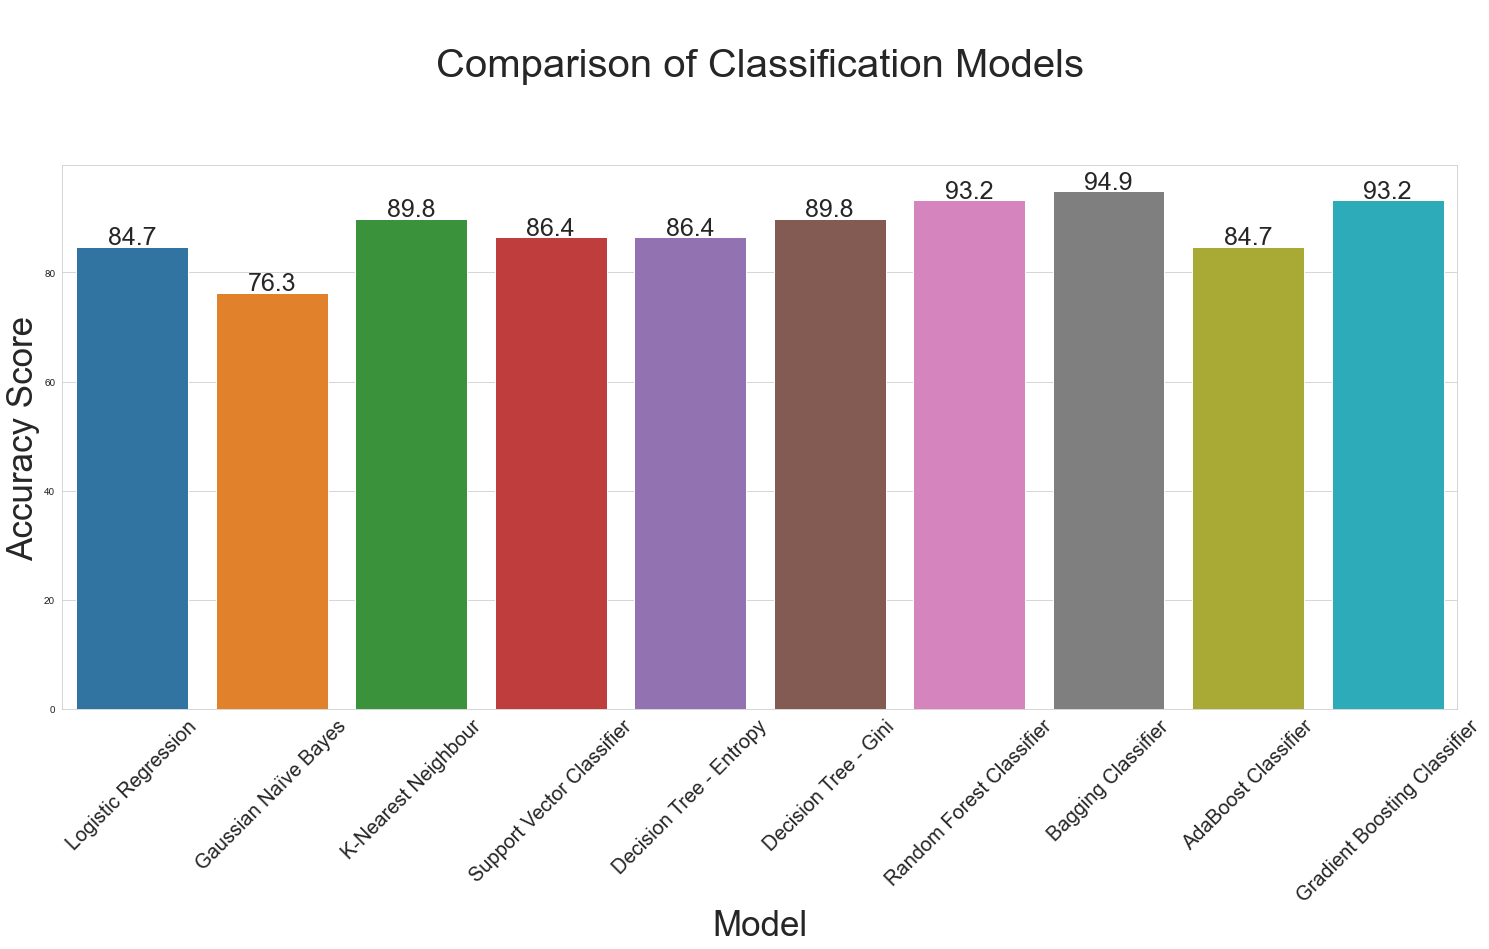

In [92]:
plt.figure(figsize=(25,10))
splot=sns.barplot(x = mdl_df['Model'], y = mdl_df['Accuracy Score of Test Data'], data = mdl_df)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center',
                   size = 25,
                   xytext = (0, 9), 
                   textcoords = 'offset points')

splot.set_xticklabels(splot.get_xmajorticklabels(), fontsize = 20,rotation=45)    

plt.xlabel('Model', fontsize = 35)
plt.ylabel('Accuracy Score', fontsize = 35)
plt.title('\nComparison of Classification Models\n\n', fontsize = 40)

#### Observaions
- The Bagging Classifier gives the best accuracy score <b>94.9 %</b> followed by Random Forest Classifier and Gradient Boosting Classifier <b>93.2 %</b>.

## ---------------------------------END----------------------------------------